In [1]:
# ! rm -rf scikit-learn-som
! git clone https://github.com/abbasidaniyal/scikit-learn-som.git

Cloning into 'scikit-learn-som'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 56 (delta 20), reused 42 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 2.02 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [4]:
%%writefile /kaggle/working/scikit-learn-som/pyproject.toml
[project]
name = "scikit-learn-som"
version = "0.0.3"
description = ""
readme = "README.md"
requires-python = ">=3.11"
dependencies = [
    "scikit-learn>=1.6.1",
]

[dependency-groups]
dev = [
    "ipython>=9.1.0",
    "jupyter>=1.1.1",
    "matplotlib>=3.10.1",
    "keras>=3.9.2",
    "optuna>=4.3.0",
    "tensorflow>=2.19.0",
    "pytest>=8.3.5",
    "coverage>=7.8.0",
    "typing-extensions>=4.13.2",
]


Overwriting /kaggle/working/scikit-learn-som/pyproject.toml


In [5]:
! pip install -e scikit-learn-som/

Obtaining file:///kaggle/working/scikit-learn-som
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 82.6 MB/s eta 0:00:00:00:0100:01
  Building editable for scikit-learn-som (pyproject.toml) ... done
  Created wheel for scikit-learn-som: filename=scikit_learn_som-0.0.3-0.editable-py3-none-any.whl size=1343 sha256=eb9eaafac14ca19e3af98e133c96b7211d4847801af2840093cb1451c74b785e
  Stored in directory: /tmp/pip-ephem-wheel-cache-deetdexs/wheels/d7/75/b2/cac6eedb8950f4ed28944143f1389fc0b10d6be99906f1a7be
Successfully built scikit-learn-som
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into accou

In [ ]:
# ! pip freeze

In [1]:
import sys
import os

# Basic
import numpy as np
import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import matplotlib.pyplot as plt

# Evaluation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


sys.path.append("/kaggle/working/scikit-learn-som/src")  # adjust path


# Your SOM model
from som import SOM


In [7]:
! wget https://desdr-server.ncsa.illinois.edu/despublic/y6a2_files/y6_gold/Y6_GOLD_2_2-260-0000.parquet

--2025-04-29 00:39:08--  https://desdr-server.ncsa.illinois.edu/despublic/y6a2_files/y6_gold/Y6_GOLD_2_2-260-0000.parquet
Resolving desdr-server.ncsa.illinois.edu (desdr-server.ncsa.illinois.edu)... 149.165.159.225
Connecting to desdr-server.ncsa.illinois.edu (desdr-server.ncsa.illinois.edu)|149.165.159.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13934194432 (13G) [application/octet-stream]
Saving to: ‘Y6_GOLD_2_2-260-0000.parquet’

Y6_GOLD_2_2-260-000 100%[===================>]  12.98G  23.0MB/s    in 9m 55s  

2025-04-29 00:49:04 (22.3 MB/s) - ‘Y6_GOLD_2_2-260-0000.parquet’ saved [13934194432/13934194432]



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Parquet file
features = ["MAG_AUTO_G", "MAG_AUTO_R", "MAG_AUTO_I", "MAG_AUTO_Z"]
df = pd.read_parquet("Y6_GOLD_2_2-260-0000.parquet", columns=features)

# Select relevant photometric columns

df = df[features].dropna()  # Remove rows with missing values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

# Split into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Flatten images from (28,28) to (784,)
# X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
# X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5815499, 4)
Test shape: (1453875, 4)


In [5]:
#Downsizing

X_train = X_train[:100000]
X_test = X_test[:1000]

In [17]:
# Initialize SOM
som = SOM(
    lattice_rows=5,
    lattice_columns=5,
    initial_learning_rate=0.1,
    neighbourhood_radius=3,
    max_iters=50000,
    learning_rate_type="exponential",
    random_state=42,
    verbose=True,
    # lattice_type="hexagonal",
    use_tqdm=True
)

# Fit SOM
som.fit(X_train)


  0%|          | 101/50000 [00:11<1:33:11,  8.92it/s]

Iter: 100: inertia: 381003.24 | Learning Rate: 0.100 | Neighbourhood factor: 2.994


  0%|          | 201/50000 [00:22<1:34:26,  8.79it/s]

Iter: 200: inertia: 353150.57 | Learning Rate: 0.100 | Neighbourhood factor: 2.988


  1%|          | 301/50000 [00:33<1:31:00,  9.10it/s]

Iter: 300: inertia: 342305.57 | Learning Rate: 0.099 | Neighbourhood factor: 2.982


  1%|          | 401/50000 [00:45<1:34:44,  8.73it/s]

Iter: 400: inertia: 370043.85 | Learning Rate: 0.099 | Neighbourhood factor: 2.976


  1%|          | 501/50000 [00:56<1:33:08,  8.86it/s]

Iter: 500: inertia: 370582.63 | Learning Rate: 0.099 | Neighbourhood factor: 2.970


  1%|          | 601/50000 [01:07<1:33:47,  8.78it/s]

Iter: 600: inertia: 363190.88 | Learning Rate: 0.099 | Neighbourhood factor: 2.964


  1%|▏         | 701/50000 [01:19<1:34:11,  8.72it/s]

Iter: 700: inertia: 352974.94 | Learning Rate: 0.099 | Neighbourhood factor: 2.958


  2%|▏         | 801/50000 [01:30<1:32:19,  8.88it/s]

Iter: 800: inertia: 335982.54 | Learning Rate: 0.098 | Neighbourhood factor: 2.952


  2%|▏         | 901/50000 [01:42<1:33:17,  8.77it/s]

Iter: 900: inertia: 372860.33 | Learning Rate: 0.098 | Neighbourhood factor: 2.946


  2%|▏         | 1001/50000 [01:53<1:30:42,  9.00it/s]

Iter: 1000: inertia: 361102.24 | Learning Rate: 0.098 | Neighbourhood factor: 2.941


  2%|▏         | 1101/50000 [02:04<1:34:43,  8.60it/s]

Iter: 1100: inertia: 380483.98 | Learning Rate: 0.098 | Neighbourhood factor: 2.935


  2%|▏         | 1201/50000 [02:16<1:30:40,  8.97it/s]

Iter: 1200: inertia: 361154.30 | Learning Rate: 0.098 | Neighbourhood factor: 2.929


  3%|▎         | 1301/50000 [02:27<1:33:17,  8.70it/s]

Iter: 1300: inertia: 371361.71 | Learning Rate: 0.097 | Neighbourhood factor: 2.923


  3%|▎         | 1401/50000 [02:39<1:32:41,  8.74it/s]

Iter: 1400: inertia: 377383.59 | Learning Rate: 0.097 | Neighbourhood factor: 2.917


  3%|▎         | 1501/50000 [02:50<1:32:37,  8.73it/s]

Iter: 1500: inertia: 376964.69 | Learning Rate: 0.097 | Neighbourhood factor: 2.911


  3%|▎         | 1601/50000 [03:01<1:31:38,  8.80it/s]

Iter: 1600: inertia: 357507.12 | Learning Rate: 0.097 | Neighbourhood factor: 2.906


  3%|▎         | 1701/50000 [03:13<1:33:14,  8.63it/s]

Iter: 1700: inertia: 365451.38 | Learning Rate: 0.097 | Neighbourhood factor: 2.900


  4%|▎         | 1801/50000 [03:24<1:32:52,  8.65it/s]

Iter: 1800: inertia: 362328.85 | Learning Rate: 0.096 | Neighbourhood factor: 2.894


  4%|▍         | 1901/50000 [03:35<1:32:54,  8.63it/s]

Iter: 1900: inertia: 384713.46 | Learning Rate: 0.096 | Neighbourhood factor: 2.888


  4%|▍         | 2001/50000 [03:47<1:32:08,  8.68it/s]

Iter: 2000: inertia: 372611.95 | Learning Rate: 0.096 | Neighbourhood factor: 2.882


  4%|▍         | 2101/50000 [03:58<1:32:25,  8.64it/s]

Iter: 2100: inertia: 365380.75 | Learning Rate: 0.096 | Neighbourhood factor: 2.877


  4%|▍         | 2201/50000 [04:09<1:30:21,  8.82it/s]

Iter: 2200: inertia: 358866.34 | Learning Rate: 0.096 | Neighbourhood factor: 2.871


  5%|▍         | 2301/50000 [04:21<1:27:50,  9.05it/s]

Iter: 2300: inertia: 375989.45 | Learning Rate: 0.096 | Neighbourhood factor: 2.865


  5%|▍         | 2401/50000 [04:32<1:30:37,  8.75it/s]

Iter: 2400: inertia: 340178.41 | Learning Rate: 0.095 | Neighbourhood factor: 2.859


  5%|▌         | 2501/50000 [04:43<1:29:29,  8.85it/s]

Iter: 2500: inertia: 350001.27 | Learning Rate: 0.095 | Neighbourhood factor: 2.854


  5%|▌         | 2601/50000 [04:55<1:28:22,  8.94it/s]

Iter: 2600: inertia: 361798.96 | Learning Rate: 0.095 | Neighbourhood factor: 2.848


  5%|▌         | 2701/50000 [05:06<1:30:32,  8.71it/s]

Iter: 2700: inertia: 373847.49 | Learning Rate: 0.095 | Neighbourhood factor: 2.842


  6%|▌         | 2801/50000 [05:18<1:32:11,  8.53it/s]

Iter: 2800: inertia: 363404.12 | Learning Rate: 0.095 | Neighbourhood factor: 2.837


  6%|▌         | 2901/50000 [05:30<1:32:34,  8.48it/s]

Iter: 2900: inertia: 381740.36 | Learning Rate: 0.094 | Neighbourhood factor: 2.831


  6%|▌         | 3001/50000 [05:41<1:30:35,  8.65it/s]

Iter: 3000: inertia: 381336.29 | Learning Rate: 0.094 | Neighbourhood factor: 2.825


  6%|▌         | 3101/50000 [05:53<1:29:24,  8.74it/s]

Iter: 3100: inertia: 371529.10 | Learning Rate: 0.094 | Neighbourhood factor: 2.820


  6%|▋         | 3201/50000 [06:04<1:30:27,  8.62it/s]

Iter: 3200: inertia: 371829.34 | Learning Rate: 0.094 | Neighbourhood factor: 2.814


  7%|▋         | 3301/50000 [06:16<1:29:38,  8.68it/s]

Iter: 3300: inertia: 375858.44 | Learning Rate: 0.094 | Neighbourhood factor: 2.808


  7%|▋         | 3401/50000 [06:27<1:29:51,  8.64it/s]

Iter: 3400: inertia: 372121.58 | Learning Rate: 0.093 | Neighbourhood factor: 2.803


  7%|▋         | 3501/50000 [06:39<1:28:37,  8.74it/s]

Iter: 3500: inertia: 381437.54 | Learning Rate: 0.093 | Neighbourhood factor: 2.797


  7%|▋         | 3601/50000 [06:50<1:25:24,  9.05it/s]

Iter: 3600: inertia: 376711.42 | Learning Rate: 0.093 | Neighbourhood factor: 2.792


  7%|▋         | 3701/50000 [07:02<1:29:14,  8.65it/s]

Iter: 3700: inertia: 341419.26 | Learning Rate: 0.093 | Neighbourhood factor: 2.786


  8%|▊         | 3801/50000 [07:13<1:29:07,  8.64it/s]

Iter: 3800: inertia: 368165.30 | Learning Rate: 0.093 | Neighbourhood factor: 2.780


  8%|▊         | 3901/50000 [07:25<1:31:17,  8.42it/s]

Iter: 3900: inertia: 370992.05 | Learning Rate: 0.092 | Neighbourhood factor: 2.775


  8%|▊         | 4001/50000 [07:36<1:30:24,  8.48it/s]

Iter: 4000: inertia: 367434.61 | Learning Rate: 0.092 | Neighbourhood factor: 2.769


  8%|▊         | 4101/50000 [07:48<1:29:27,  8.55it/s]

Iter: 4100: inertia: 363241.34 | Learning Rate: 0.092 | Neighbourhood factor: 2.764


  8%|▊         | 4201/50000 [07:59<1:25:18,  8.95it/s]

Iter: 4200: inertia: 349788.06 | Learning Rate: 0.092 | Neighbourhood factor: 2.758


  9%|▊         | 4301/50000 [08:11<1:27:13,  8.73it/s]

Iter: 4300: inertia: 354519.63 | Learning Rate: 0.092 | Neighbourhood factor: 2.753


  9%|▉         | 4401/50000 [08:22<1:26:16,  8.81it/s]

Iter: 4400: inertia: 365450.45 | Learning Rate: 0.092 | Neighbourhood factor: 2.747


  9%|▉         | 4501/50000 [08:34<1:28:08,  8.60it/s]

Iter: 4500: inertia: 375576.75 | Learning Rate: 0.091 | Neighbourhood factor: 2.742


  9%|▉         | 4601/50000 [08:45<1:26:48,  8.72it/s]

Iter: 4600: inertia: 378511.00 | Learning Rate: 0.091 | Neighbourhood factor: 2.736


  9%|▉         | 4701/50000 [08:57<1:23:59,  8.99it/s]

Iter: 4700: inertia: 365784.07 | Learning Rate: 0.091 | Neighbourhood factor: 2.731


 10%|▉         | 4801/50000 [09:08<1:27:57,  8.56it/s]

Iter: 4800: inertia: 358899.29 | Learning Rate: 0.091 | Neighbourhood factor: 2.725


 10%|▉         | 4901/50000 [09:20<1:27:17,  8.61it/s]

Iter: 4900: inertia: 372644.64 | Learning Rate: 0.091 | Neighbourhood factor: 2.720


 10%|█         | 5001/50000 [09:32<1:26:01,  8.72it/s]

Iter: 5000: inertia: 348044.84 | Learning Rate: 0.090 | Neighbourhood factor: 2.715


 10%|█         | 5101/50000 [09:43<1:25:37,  8.74it/s]

Iter: 5100: inertia: 360809.34 | Learning Rate: 0.090 | Neighbourhood factor: 2.709


 10%|█         | 5201/50000 [09:55<1:24:29,  8.84it/s]

Iter: 5200: inertia: 358955.12 | Learning Rate: 0.090 | Neighbourhood factor: 2.704


 11%|█         | 5301/50000 [10:06<1:26:33,  8.61it/s]

Iter: 5300: inertia: 358585.29 | Learning Rate: 0.090 | Neighbourhood factor: 2.698


 11%|█         | 5401/50000 [10:18<1:25:11,  8.72it/s]

Iter: 5400: inertia: 354924.59 | Learning Rate: 0.090 | Neighbourhood factor: 2.693


 11%|█         | 5501/50000 [10:29<1:24:21,  8.79it/s]

Iter: 5500: inertia: 375800.89 | Learning Rate: 0.090 | Neighbourhood factor: 2.688


 11%|█         | 5601/50000 [10:41<1:25:23,  8.67it/s]

Iter: 5600: inertia: 364526.42 | Learning Rate: 0.089 | Neighbourhood factor: 2.682


 11%|█▏        | 5701/50000 [10:52<1:23:42,  8.82it/s]

Iter: 5700: inertia: 358510.50 | Learning Rate: 0.089 | Neighbourhood factor: 2.677


 12%|█▏        | 5801/50000 [11:04<1:25:40,  8.60it/s]

Iter: 5800: inertia: 361997.16 | Learning Rate: 0.089 | Neighbourhood factor: 2.671


 12%|█▏        | 5901/50000 [11:15<1:28:22,  8.32it/s]

Iter: 5900: inertia: 364006.28 | Learning Rate: 0.089 | Neighbourhood factor: 2.666


 12%|█▏        | 6001/50000 [11:26<1:24:10,  8.71it/s]

Iter: 6000: inertia: 362022.59 | Learning Rate: 0.089 | Neighbourhood factor: 2.661


 12%|█▏        | 6101/50000 [11:38<1:24:19,  8.68it/s]

Iter: 6100: inertia: 369823.39 | Learning Rate: 0.089 | Neighbourhood factor: 2.655


 12%|█▏        | 6201/50000 [11:50<1:23:58,  8.69it/s]

Iter: 6200: inertia: 355636.13 | Learning Rate: 0.088 | Neighbourhood factor: 2.650


 13%|█▎        | 6301/50000 [12:01<1:20:42,  9.02it/s]

Iter: 6300: inertia: 360910.51 | Learning Rate: 0.088 | Neighbourhood factor: 2.645


 13%|█▎        | 6401/50000 [12:12<1:23:39,  8.69it/s]

Iter: 6400: inertia: 372193.40 | Learning Rate: 0.088 | Neighbourhood factor: 2.640


 13%|█▎        | 6501/50000 [12:24<1:23:25,  8.69it/s]

Iter: 6500: inertia: 365677.31 | Learning Rate: 0.088 | Neighbourhood factor: 2.634


 13%|█▎        | 6601/50000 [12:35<1:24:48,  8.53it/s]

Iter: 6600: inertia: 352381.44 | Learning Rate: 0.088 | Neighbourhood factor: 2.629


 13%|█▎        | 6701/50000 [12:47<1:23:22,  8.66it/s]

Iter: 6700: inertia: 372249.08 | Learning Rate: 0.087 | Neighbourhood factor: 2.624


 14%|█▎        | 6801/50000 [12:58<1:20:54,  8.90it/s]

Iter: 6800: inertia: 330806.48 | Learning Rate: 0.087 | Neighbourhood factor: 2.619


 14%|█▍        | 6901/50000 [13:10<1:22:45,  8.68it/s]

Iter: 6900: inertia: 337356.40 | Learning Rate: 0.087 | Neighbourhood factor: 2.613


 14%|█▍        | 7001/50000 [13:21<1:23:33,  8.58it/s]

Iter: 7000: inertia: 379229.84 | Learning Rate: 0.087 | Neighbourhood factor: 2.608


 14%|█▍        | 7101/50000 [13:33<1:23:36,  8.55it/s]

Iter: 7100: inertia: 374360.12 | Learning Rate: 0.087 | Neighbourhood factor: 2.603


 14%|█▍        | 7201/50000 [13:45<1:22:01,  8.70it/s]

Iter: 7200: inertia: 357912.61 | Learning Rate: 0.087 | Neighbourhood factor: 2.598


 15%|█▍        | 7301/50000 [13:56<1:20:17,  8.86it/s]

Iter: 7300: inertia: 366677.88 | Learning Rate: 0.086 | Neighbourhood factor: 2.592


 15%|█▍        | 7401/50000 [14:08<1:21:00,  8.76it/s]

Iter: 7400: inertia: 346320.60 | Learning Rate: 0.086 | Neighbourhood factor: 2.587


 15%|█▌        | 7501/50000 [14:19<1:19:24,  8.92it/s]

Iter: 7500: inertia: 356348.62 | Learning Rate: 0.086 | Neighbourhood factor: 2.582


 15%|█▌        | 7601/50000 [14:30<1:19:46,  8.86it/s]

Iter: 7600: inertia: 350970.50 | Learning Rate: 0.086 | Neighbourhood factor: 2.577


 15%|█▌        | 7701/50000 [14:42<1:21:11,  8.68it/s]

Iter: 7700: inertia: 332604.80 | Learning Rate: 0.086 | Neighbourhood factor: 2.572


 16%|█▌        | 7801/50000 [14:53<1:20:48,  8.70it/s]

Iter: 7800: inertia: 350082.90 | Learning Rate: 0.086 | Neighbourhood factor: 2.567


 16%|█▌        | 7901/50000 [15:05<1:19:29,  8.83it/s]

Iter: 7900: inertia: 360815.42 | Learning Rate: 0.085 | Neighbourhood factor: 2.562


 16%|█▌        | 8001/50000 [15:16<1:20:41,  8.68it/s]

Iter: 8000: inertia: 377180.12 | Learning Rate: 0.085 | Neighbourhood factor: 2.556


 16%|█▌        | 8101/50000 [15:27<1:19:14,  8.81it/s]

Iter: 8100: inertia: 368430.44 | Learning Rate: 0.085 | Neighbourhood factor: 2.551


 16%|█▋        | 8201/50000 [15:39<1:18:41,  8.85it/s]

Iter: 8200: inertia: 364066.62 | Learning Rate: 0.085 | Neighbourhood factor: 2.546


 17%|█▋        | 8301/50000 [15:50<1:18:24,  8.86it/s]

Iter: 8300: inertia: 357753.03 | Learning Rate: 0.085 | Neighbourhood factor: 2.541


 17%|█▋        | 8401/50000 [16:01<1:17:36,  8.93it/s]

Iter: 8400: inertia: 347848.39 | Learning Rate: 0.085 | Neighbourhood factor: 2.536


 17%|█▋        | 8501/50000 [16:13<1:20:57,  8.54it/s]

Iter: 8500: inertia: 376743.51 | Learning Rate: 0.084 | Neighbourhood factor: 2.531


 17%|█▋        | 8601/50000 [16:24<1:18:57,  8.74it/s]

Iter: 8600: inertia: 368492.06 | Learning Rate: 0.084 | Neighbourhood factor: 2.526


 17%|█▋        | 8701/50000 [16:36<1:20:28,  8.55it/s]

Iter: 8700: inertia: 353287.37 | Learning Rate: 0.084 | Neighbourhood factor: 2.521


 18%|█▊        | 8801/50000 [16:47<1:16:31,  8.97it/s]

Iter: 8800: inertia: 342345.42 | Learning Rate: 0.084 | Neighbourhood factor: 2.516


 18%|█▊        | 8901/50000 [16:59<1:18:40,  8.71it/s]

Iter: 8900: inertia: 372090.74 | Learning Rate: 0.084 | Neighbourhood factor: 2.511


 18%|█▊        | 9001/50000 [17:10<1:18:54,  8.66it/s]

Iter: 9000: inertia: 358997.23 | Learning Rate: 0.084 | Neighbourhood factor: 2.506


 18%|█▊        | 9101/50000 [17:22<1:19:45,  8.55it/s]

Iter: 9100: inertia: 373085.15 | Learning Rate: 0.083 | Neighbourhood factor: 2.501


 18%|█▊        | 9201/50000 [17:33<1:18:22,  8.68it/s]

Iter: 9200: inertia: 367992.26 | Learning Rate: 0.083 | Neighbourhood factor: 2.496


 19%|█▊        | 9301/50000 [17:45<1:16:59,  8.81it/s]

Iter: 9300: inertia: 364425.09 | Learning Rate: 0.083 | Neighbourhood factor: 2.491


 19%|█▉        | 9401/50000 [17:56<1:18:43,  8.59it/s]

Iter: 9400: inertia: 354268.43 | Learning Rate: 0.083 | Neighbourhood factor: 2.486


 19%|█▉        | 9501/50000 [18:08<1:19:19,  8.51it/s]

Iter: 9500: inertia: 360041.03 | Learning Rate: 0.083 | Neighbourhood factor: 2.481


 19%|█▉        | 9601/50000 [18:19<1:16:09,  8.84it/s]

Iter: 9600: inertia: 365738.04 | Learning Rate: 0.083 | Neighbourhood factor: 2.476


 19%|█▉        | 9701/50000 [18:31<1:16:11,  8.81it/s]

Iter: 9700: inertia: 350399.24 | Learning Rate: 0.082 | Neighbourhood factor: 2.471


 20%|█▉        | 9801/50000 [18:42<1:16:59,  8.70it/s]

Iter: 9800: inertia: 357183.49 | Learning Rate: 0.082 | Neighbourhood factor: 2.466


 20%|█▉        | 9901/50000 [18:54<1:17:38,  8.61it/s]

Iter: 9900: inertia: 346201.77 | Learning Rate: 0.082 | Neighbourhood factor: 2.461


 20%|██        | 10001/50000 [19:06<1:18:58,  8.44it/s]

Iter: 10000: inertia: 364526.74 | Learning Rate: 0.082 | Neighbourhood factor: 2.456


 20%|██        | 10101/50000 [19:17<1:18:30,  8.47it/s]

Iter: 10100: inertia: 361947.43 | Learning Rate: 0.082 | Neighbourhood factor: 2.451


 20%|██        | 10201/50000 [19:29<1:15:41,  8.76it/s]

Iter: 10200: inertia: 370309.18 | Learning Rate: 0.082 | Neighbourhood factor: 2.446


 21%|██        | 10301/50000 [19:40<1:17:39,  8.52it/s]

Iter: 10300: inertia: 357464.13 | Learning Rate: 0.081 | Neighbourhood factor: 2.441


 21%|██        | 10401/50000 [19:52<1:16:41,  8.61it/s]

Iter: 10400: inertia: 369403.78 | Learning Rate: 0.081 | Neighbourhood factor: 2.437


 21%|██        | 10501/50000 [20:04<1:17:18,  8.52it/s]

Iter: 10500: inertia: 349130.10 | Learning Rate: 0.081 | Neighbourhood factor: 2.432


 21%|██        | 10601/50000 [20:15<1:17:26,  8.48it/s]

Iter: 10600: inertia: 364546.39 | Learning Rate: 0.081 | Neighbourhood factor: 2.427


 21%|██▏       | 10701/50000 [20:27<1:14:42,  8.77it/s]

Iter: 10700: inertia: 359704.22 | Learning Rate: 0.081 | Neighbourhood factor: 2.422


 22%|██▏       | 10801/50000 [20:38<1:19:30,  8.22it/s]

Iter: 10800: inertia: 355290.38 | Learning Rate: 0.081 | Neighbourhood factor: 2.417


 22%|██▏       | 10901/50000 [20:50<1:14:19,  8.77it/s]

Iter: 10900: inertia: 369204.03 | Learning Rate: 0.080 | Neighbourhood factor: 2.412


 22%|██▏       | 11001/50000 [21:01<1:15:53,  8.57it/s]

Iter: 11000: inertia: 358881.09 | Learning Rate: 0.080 | Neighbourhood factor: 2.408


 22%|██▏       | 11101/50000 [21:13<1:14:14,  8.73it/s]

Iter: 11100: inertia: 357228.33 | Learning Rate: 0.080 | Neighbourhood factor: 2.403


 22%|██▏       | 11201/50000 [21:24<1:15:15,  8.59it/s]

Iter: 11200: inertia: 359163.24 | Learning Rate: 0.080 | Neighbourhood factor: 2.398


 23%|██▎       | 11301/50000 [21:36<1:14:18,  8.68it/s]

Iter: 11300: inertia: 365553.57 | Learning Rate: 0.080 | Neighbourhood factor: 2.393


 23%|██▎       | 11401/50000 [21:47<1:13:38,  8.74it/s]

Iter: 11400: inertia: 366367.85 | Learning Rate: 0.080 | Neighbourhood factor: 2.388


 23%|██▎       | 11501/50000 [21:59<1:11:41,  8.95it/s]

Iter: 11500: inertia: 353079.11 | Learning Rate: 0.079 | Neighbourhood factor: 2.384


 23%|██▎       | 11601/50000 [22:10<1:14:04,  8.64it/s]

Iter: 11600: inertia: 365609.46 | Learning Rate: 0.079 | Neighbourhood factor: 2.379


 23%|██▎       | 11701/50000 [22:22<1:14:14,  8.60it/s]

Iter: 11700: inertia: 364034.58 | Learning Rate: 0.079 | Neighbourhood factor: 2.374


 24%|██▎       | 11801/50000 [22:33<1:13:21,  8.68it/s]

Iter: 11800: inertia: 334155.83 | Learning Rate: 0.079 | Neighbourhood factor: 2.369


 24%|██▍       | 11901/50000 [22:44<1:16:29,  8.30it/s]

Iter: 11900: inertia: 364653.39 | Learning Rate: 0.079 | Neighbourhood factor: 2.365


 24%|██▍       | 12001/50000 [22:56<1:15:16,  8.41it/s]

Iter: 12000: inertia: 378876.21 | Learning Rate: 0.079 | Neighbourhood factor: 2.360


 24%|██▍       | 12101/50000 [23:07<1:11:47,  8.80it/s]

Iter: 12100: inertia: 346761.41 | Learning Rate: 0.079 | Neighbourhood factor: 2.355


 24%|██▍       | 12201/50000 [23:18<1:11:29,  8.81it/s]

Iter: 12200: inertia: 347144.76 | Learning Rate: 0.078 | Neighbourhood factor: 2.350


 25%|██▍       | 12301/50000 [23:30<1:10:32,  8.91it/s]

Iter: 12300: inertia: 338548.71 | Learning Rate: 0.078 | Neighbourhood factor: 2.346


 25%|██▍       | 12401/50000 [23:41<1:10:40,  8.87it/s]

Iter: 12400: inertia: 366319.18 | Learning Rate: 0.078 | Neighbourhood factor: 2.341


 25%|██▌       | 12501/50000 [23:52<1:09:07,  9.04it/s]

Iter: 12500: inertia: 377739.83 | Learning Rate: 0.078 | Neighbourhood factor: 2.336


 25%|██▌       | 12601/50000 [24:04<1:11:06,  8.77it/s]

Iter: 12600: inertia: 347813.41 | Learning Rate: 0.078 | Neighbourhood factor: 2.332


 25%|██▌       | 12701/50000 [24:15<1:12:50,  8.53it/s]

Iter: 12700: inertia: 364177.40 | Learning Rate: 0.078 | Neighbourhood factor: 2.327


 26%|██▌       | 12801/50000 [24:27<1:09:52,  8.87it/s]

Iter: 12800: inertia: 346952.88 | Learning Rate: 0.077 | Neighbourhood factor: 2.322


 26%|██▌       | 12901/50000 [24:38<1:10:49,  8.73it/s]

Iter: 12900: inertia: 345364.06 | Learning Rate: 0.077 | Neighbourhood factor: 2.318


 26%|██▌       | 13001/50000 [24:49<1:10:20,  8.77it/s]

Iter: 13000: inertia: 359091.48 | Learning Rate: 0.077 | Neighbourhood factor: 2.313


 26%|██▌       | 13101/50000 [25:01<1:11:26,  8.61it/s]

Iter: 13100: inertia: 353210.90 | Learning Rate: 0.077 | Neighbourhood factor: 2.309


 26%|██▋       | 13201/50000 [25:12<1:09:36,  8.81it/s]

Iter: 13200: inertia: 346001.41 | Learning Rate: 0.077 | Neighbourhood factor: 2.304


 27%|██▋       | 13301/50000 [25:23<1:10:47,  8.64it/s]

Iter: 13300: inertia: 361957.49 | Learning Rate: 0.077 | Neighbourhood factor: 2.299


 27%|██▋       | 13401/50000 [25:35<1:10:56,  8.60it/s]

Iter: 13400: inertia: 350146.56 | Learning Rate: 0.076 | Neighbourhood factor: 2.295


 27%|██▋       | 13501/50000 [25:46<1:08:25,  8.89it/s]

Iter: 13500: inertia: 355309.82 | Learning Rate: 0.076 | Neighbourhood factor: 2.290


 27%|██▋       | 13601/50000 [25:58<1:09:02,  8.79it/s]

Iter: 13600: inertia: 341820.10 | Learning Rate: 0.076 | Neighbourhood factor: 2.286


 27%|██▋       | 13701/50000 [26:09<1:08:37,  8.82it/s]

Iter: 13700: inertia: 368095.15 | Learning Rate: 0.076 | Neighbourhood factor: 2.281


 28%|██▊       | 13801/50000 [26:20<1:08:55,  8.75it/s]

Iter: 13800: inertia: 371656.99 | Learning Rate: 0.076 | Neighbourhood factor: 2.276


 28%|██▊       | 13901/50000 [26:32<1:08:55,  8.73it/s]

Iter: 13900: inertia: 375712.40 | Learning Rate: 0.076 | Neighbourhood factor: 2.272


 28%|██▊       | 14001/50000 [26:43<1:07:23,  8.90it/s]

Iter: 14000: inertia: 345202.49 | Learning Rate: 0.076 | Neighbourhood factor: 2.267


 28%|██▊       | 14101/50000 [26:54<1:10:06,  8.53it/s]

Iter: 14100: inertia: 349588.04 | Learning Rate: 0.075 | Neighbourhood factor: 2.263


 28%|██▊       | 14201/50000 [27:06<1:07:45,  8.81it/s]

Iter: 14200: inertia: 368458.11 | Learning Rate: 0.075 | Neighbourhood factor: 2.258


 29%|██▊       | 14301/50000 [27:17<1:07:03,  8.87it/s]

Iter: 14300: inertia: 348020.91 | Learning Rate: 0.075 | Neighbourhood factor: 2.254


 29%|██▉       | 14401/50000 [27:28<1:07:24,  8.80it/s]

Iter: 14400: inertia: 356291.37 | Learning Rate: 0.075 | Neighbourhood factor: 2.249


 29%|██▉       | 14501/50000 [27:40<1:07:47,  8.73it/s]

Iter: 14500: inertia: 356222.80 | Learning Rate: 0.075 | Neighbourhood factor: 2.245


 29%|██▉       | 14601/50000 [27:51<1:07:21,  8.76it/s]

Iter: 14600: inertia: 364789.15 | Learning Rate: 0.075 | Neighbourhood factor: 2.240


 29%|██▉       | 14701/50000 [28:03<1:05:52,  8.93it/s]

Iter: 14700: inertia: 331616.53 | Learning Rate: 0.075 | Neighbourhood factor: 2.236


 30%|██▉       | 14801/50000 [28:14<1:06:50,  8.78it/s]

Iter: 14800: inertia: 340765.45 | Learning Rate: 0.074 | Neighbourhood factor: 2.231


 30%|██▉       | 14901/50000 [28:25<1:07:50,  8.62it/s]

Iter: 14900: inertia: 329973.71 | Learning Rate: 0.074 | Neighbourhood factor: 2.227


 30%|███       | 15001/50000 [28:37<1:07:18,  8.67it/s]

Iter: 15000: inertia: 360564.18 | Learning Rate: 0.074 | Neighbourhood factor: 2.222


 30%|███       | 15101/50000 [28:48<1:05:37,  8.86it/s]

Iter: 15100: inertia: 342623.16 | Learning Rate: 0.074 | Neighbourhood factor: 2.218


 30%|███       | 15201/50000 [28:59<1:06:57,  8.66it/s]

Iter: 15200: inertia: 347576.06 | Learning Rate: 0.074 | Neighbourhood factor: 2.214


 31%|███       | 15301/50000 [29:11<1:05:44,  8.80it/s]

Iter: 15300: inertia: 355644.11 | Learning Rate: 0.074 | Neighbourhood factor: 2.209


 31%|███       | 15401/50000 [29:22<1:07:05,  8.60it/s]

Iter: 15400: inertia: 363053.44 | Learning Rate: 0.073 | Neighbourhood factor: 2.205


 31%|███       | 15501/50000 [29:34<1:06:09,  8.69it/s]

Iter: 15500: inertia: 356812.52 | Learning Rate: 0.073 | Neighbourhood factor: 2.200


 31%|███       | 15601/50000 [29:45<1:06:49,  8.58it/s]

Iter: 15600: inertia: 324698.22 | Learning Rate: 0.073 | Neighbourhood factor: 2.196


 31%|███▏      | 15701/50000 [29:57<1:06:03,  8.65it/s]

Iter: 15700: inertia: 345669.66 | Learning Rate: 0.073 | Neighbourhood factor: 2.192


 32%|███▏      | 15801/50000 [30:08<1:04:34,  8.83it/s]

Iter: 15800: inertia: 348607.12 | Learning Rate: 0.073 | Neighbourhood factor: 2.187


 32%|███▏      | 15901/50000 [30:19<1:04:24,  8.82it/s]

Iter: 15900: inertia: 330677.72 | Learning Rate: 0.073 | Neighbourhood factor: 2.183


 32%|███▏      | 16001/50000 [30:31<1:05:14,  8.69it/s]

Iter: 16000: inertia: 326907.93 | Learning Rate: 0.073 | Neighbourhood factor: 2.178


 32%|███▏      | 16101/50000 [30:42<1:00:55,  9.27it/s]

Iter: 16100: inertia: 335162.87 | Learning Rate: 0.072 | Neighbourhood factor: 2.174


 32%|███▏      | 16201/50000 [30:53<1:04:11,  8.77it/s]

Iter: 16200: inertia: 331918.56 | Learning Rate: 0.072 | Neighbourhood factor: 2.170


 33%|███▎      | 16301/50000 [31:05<1:01:41,  9.10it/s]

Iter: 16300: inertia: 323347.68 | Learning Rate: 0.072 | Neighbourhood factor: 2.165


 33%|███▎      | 16401/50000 [31:16<1:02:52,  8.91it/s]

Iter: 16400: inertia: 354580.75 | Learning Rate: 0.072 | Neighbourhood factor: 2.161


 33%|███▎      | 16501/50000 [31:27<1:04:29,  8.66it/s]

Iter: 16500: inertia: 344285.14 | Learning Rate: 0.072 | Neighbourhood factor: 2.157


 33%|███▎      | 16601/50000 [31:38<1:03:28,  8.77it/s]

Iter: 16600: inertia: 341898.07 | Learning Rate: 0.072 | Neighbourhood factor: 2.152


 33%|███▎      | 16701/50000 [31:50<1:01:46,  8.98it/s]

Iter: 16700: inertia: 324227.55 | Learning Rate: 0.072 | Neighbourhood factor: 2.148


 34%|███▎      | 16801/50000 [32:01<1:02:52,  8.80it/s]

Iter: 16800: inertia: 323963.29 | Learning Rate: 0.071 | Neighbourhood factor: 2.144


 34%|███▍      | 16901/50000 [32:12<1:00:31,  9.11it/s]

Iter: 16900: inertia: 344200.61 | Learning Rate: 0.071 | Neighbourhood factor: 2.140


 34%|███▍      | 17001/50000 [32:23<1:03:01,  8.73it/s]

Iter: 17000: inertia: 352467.93 | Learning Rate: 0.071 | Neighbourhood factor: 2.135


 34%|███▍      | 17101/50000 [32:35<59:51,  9.16it/s]  

Iter: 17100: inertia: 326161.71 | Learning Rate: 0.071 | Neighbourhood factor: 2.131


 34%|███▍      | 17201/50000 [32:46<1:01:07,  8.94it/s]

Iter: 17200: inertia: 336332.46 | Learning Rate: 0.071 | Neighbourhood factor: 2.127


 35%|███▍      | 17301/50000 [32:57<1:00:41,  8.98it/s]

Iter: 17300: inertia: 337660.68 | Learning Rate: 0.071 | Neighbourhood factor: 2.123


 35%|███▍      | 17401/50000 [33:09<1:04:29,  8.43it/s]

Iter: 17400: inertia: 314238.92 | Learning Rate: 0.071 | Neighbourhood factor: 2.118


 35%|███▌      | 17501/50000 [33:20<1:01:09,  8.86it/s]

Iter: 17500: inertia: 324155.93 | Learning Rate: 0.070 | Neighbourhood factor: 2.114


 35%|███▌      | 17601/50000 [33:31<1:01:35,  8.77it/s]

Iter: 17600: inertia: 336847.87 | Learning Rate: 0.070 | Neighbourhood factor: 2.110


 35%|███▌      | 17701/50000 [33:43<58:17,  9.23it/s]  

Iter: 17700: inertia: 357999.47 | Learning Rate: 0.070 | Neighbourhood factor: 2.106


 36%|███▌      | 17801/50000 [33:54<1:00:41,  8.84it/s]

Iter: 17800: inertia: 358800.24 | Learning Rate: 0.070 | Neighbourhood factor: 2.101


 36%|███▌      | 17901/50000 [34:05<1:01:04,  8.76it/s]

Iter: 17900: inertia: 332356.52 | Learning Rate: 0.070 | Neighbourhood factor: 2.097


 36%|███▌      | 18001/50000 [34:17<1:01:01,  8.74it/s]

Iter: 18000: inertia: 357405.49 | Learning Rate: 0.070 | Neighbourhood factor: 2.093


 36%|███▌      | 18101/50000 [34:28<1:00:52,  8.73it/s]

Iter: 18100: inertia: 311576.18 | Learning Rate: 0.070 | Neighbourhood factor: 2.089


 36%|███▋      | 18201/50000 [34:39<58:52,  9.00it/s]  

Iter: 18200: inertia: 334987.73 | Learning Rate: 0.069 | Neighbourhood factor: 2.085


 37%|███▋      | 18301/50000 [34:51<1:00:01,  8.80it/s]

Iter: 18300: inertia: 348711.79 | Learning Rate: 0.069 | Neighbourhood factor: 2.081


 37%|███▋      | 18401/50000 [35:02<59:12,  8.89it/s]  

Iter: 18400: inertia: 345639.20 | Learning Rate: 0.069 | Neighbourhood factor: 2.076


 37%|███▋      | 18501/50000 [35:13<1:00:00,  8.75it/s]

Iter: 18500: inertia: 329590.38 | Learning Rate: 0.069 | Neighbourhood factor: 2.072


 37%|███▋      | 18601/50000 [35:25<57:37,  9.08it/s]  

Iter: 18600: inertia: 348837.86 | Learning Rate: 0.069 | Neighbourhood factor: 2.068


 37%|███▋      | 18701/50000 [35:36<58:30,  8.91it/s]  

Iter: 18700: inertia: 349622.03 | Learning Rate: 0.069 | Neighbourhood factor: 2.064


 38%|███▊      | 18801/50000 [35:47<57:00,  9.12it/s]  

Iter: 18800: inertia: 331026.75 | Learning Rate: 0.069 | Neighbourhood factor: 2.060


 38%|███▊      | 18901/50000 [35:59<59:24,  8.72it/s]  

Iter: 18900: inertia: 349156.81 | Learning Rate: 0.069 | Neighbourhood factor: 2.056


 38%|███▊      | 19001/50000 [36:10<58:23,  8.85it/s]  

Iter: 19000: inertia: 355600.93 | Learning Rate: 0.068 | Neighbourhood factor: 2.052


 38%|███▊      | 19101/50000 [36:21<58:30,  8.80it/s]  

Iter: 19100: inertia: 337456.45 | Learning Rate: 0.068 | Neighbourhood factor: 2.047


 38%|███▊      | 19201/50000 [36:33<59:07,  8.68it/s]  

Iter: 19200: inertia: 324200.96 | Learning Rate: 0.068 | Neighbourhood factor: 2.043


 39%|███▊      | 19301/50000 [36:44<56:47,  9.01it/s]  

Iter: 19300: inertia: 318351.66 | Learning Rate: 0.068 | Neighbourhood factor: 2.039


 39%|███▉      | 19401/50000 [36:56<58:24,  8.73it/s]  

Iter: 19400: inertia: 315881.73 | Learning Rate: 0.068 | Neighbourhood factor: 2.035


 39%|███▉      | 19501/50000 [37:07<58:31,  8.69it/s]  

Iter: 19500: inertia: 337117.57 | Learning Rate: 0.068 | Neighbourhood factor: 2.031


 39%|███▉      | 19601/50000 [37:19<59:00,  8.59it/s]  

Iter: 19600: inertia: 329848.20 | Learning Rate: 0.068 | Neighbourhood factor: 2.027


 39%|███▉      | 19701/50000 [37:30<58:40,  8.61it/s]  

Iter: 19700: inertia: 324149.09 | Learning Rate: 0.067 | Neighbourhood factor: 2.023


 40%|███▉      | 19801/50000 [37:42<58:09,  8.65it/s]  

Iter: 19800: inertia: 321922.90 | Learning Rate: 0.067 | Neighbourhood factor: 2.019


 40%|███▉      | 19901/50000 [37:53<57:52,  8.67it/s]

Iter: 19900: inertia: 357049.22 | Learning Rate: 0.067 | Neighbourhood factor: 2.015


 40%|████      | 20001/50000 [38:05<57:37,  8.68it/s]

Iter: 20000: inertia: 350874.98 | Learning Rate: 0.067 | Neighbourhood factor: 2.011


 40%|████      | 20101/50000 [38:16<57:33,  8.66it/s]  

Iter: 20100: inertia: 342176.88 | Learning Rate: 0.067 | Neighbourhood factor: 2.007


 40%|████      | 20201/50000 [38:27<56:08,  8.85it/s]  

Iter: 20200: inertia: 324867.93 | Learning Rate: 0.067 | Neighbourhood factor: 2.003


 41%|████      | 20301/50000 [38:39<56:36,  8.74it/s]

Iter: 20300: inertia: 332062.15 | Learning Rate: 0.067 | Neighbourhood factor: 1.999


 41%|████      | 20401/50000 [38:50<57:10,  8.63it/s]

Iter: 20400: inertia: 344481.69 | Learning Rate: 0.066 | Neighbourhood factor: 1.995


 41%|████      | 20501/50000 [39:02<57:11,  8.60it/s]

Iter: 20500: inertia: 335621.57 | Learning Rate: 0.066 | Neighbourhood factor: 1.991


 41%|████      | 20601/50000 [39:13<55:09,  8.88it/s]

Iter: 20600: inertia: 323323.11 | Learning Rate: 0.066 | Neighbourhood factor: 1.987


 41%|████▏     | 20701/50000 [39:24<56:26,  8.65it/s]

Iter: 20700: inertia: 331005.18 | Learning Rate: 0.066 | Neighbourhood factor: 1.983


 42%|████▏     | 20801/50000 [39:36<55:12,  8.81it/s]

Iter: 20800: inertia: 320693.23 | Learning Rate: 0.066 | Neighbourhood factor: 1.979


 42%|████▏     | 20901/50000 [39:47<53:12,  9.11it/s]

Iter: 20900: inertia: 332909.08 | Learning Rate: 0.066 | Neighbourhood factor: 1.975


 42%|████▏     | 21001/50000 [39:58<54:18,  8.90it/s]  

Iter: 21000: inertia: 360930.73 | Learning Rate: 0.066 | Neighbourhood factor: 1.971


 42%|████▏     | 21101/50000 [40:10<53:52,  8.94it/s]

Iter: 21100: inertia: 324260.67 | Learning Rate: 0.066 | Neighbourhood factor: 1.967


 42%|████▏     | 21201/50000 [40:21<54:21,  8.83it/s]

Iter: 21200: inertia: 339019.64 | Learning Rate: 0.065 | Neighbourhood factor: 1.963


 43%|████▎     | 21301/50000 [40:32<53:27,  8.95it/s]

Iter: 21300: inertia: 338231.95 | Learning Rate: 0.065 | Neighbourhood factor: 1.959


 43%|████▎     | 21401/50000 [40:43<53:08,  8.97it/s]

Iter: 21400: inertia: 351610.29 | Learning Rate: 0.065 | Neighbourhood factor: 1.955


 43%|████▎     | 21501/50000 [40:55<52:19,  9.08it/s]

Iter: 21500: inertia: 330902.15 | Learning Rate: 0.065 | Neighbourhood factor: 1.952


 43%|████▎     | 21601/50000 [41:06<54:05,  8.75it/s]  

Iter: 21600: inertia: 335964.05 | Learning Rate: 0.065 | Neighbourhood factor: 1.948


 43%|████▎     | 21701/50000 [41:18<53:20,  8.84it/s]

Iter: 21700: inertia: 337397.92 | Learning Rate: 0.065 | Neighbourhood factor: 1.944


 44%|████▎     | 21801/50000 [41:29<53:31,  8.78it/s]

Iter: 21800: inertia: 340833.55 | Learning Rate: 0.065 | Neighbourhood factor: 1.940


 44%|████▍     | 21901/50000 [41:40<53:15,  8.79it/s]

Iter: 21900: inertia: 318184.05 | Learning Rate: 0.065 | Neighbourhood factor: 1.936


 44%|████▍     | 22001/50000 [41:52<53:33,  8.71it/s]

Iter: 22000: inertia: 314905.80 | Learning Rate: 0.064 | Neighbourhood factor: 1.932


 44%|████▍     | 22101/50000 [42:03<52:06,  8.92it/s]

Iter: 22100: inertia: 301163.19 | Learning Rate: 0.064 | Neighbourhood factor: 1.928


 44%|████▍     | 22201/50000 [42:14<51:54,  8.93it/s]

Iter: 22200: inertia: 304161.98 | Learning Rate: 0.064 | Neighbourhood factor: 1.924


 45%|████▍     | 22301/50000 [42:26<51:40,  8.93it/s]

Iter: 22300: inertia: 300304.24 | Learning Rate: 0.064 | Neighbourhood factor: 1.921


 45%|████▍     | 22401/50000 [42:37<52:51,  8.70it/s]

Iter: 22400: inertia: 308905.76 | Learning Rate: 0.064 | Neighbourhood factor: 1.917


 45%|████▌     | 22501/50000 [42:48<51:07,  8.96it/s]

Iter: 22500: inertia: 331603.30 | Learning Rate: 0.064 | Neighbourhood factor: 1.913


 45%|████▌     | 22601/50000 [43:00<51:23,  8.89it/s]

Iter: 22600: inertia: 318168.11 | Learning Rate: 0.064 | Neighbourhood factor: 1.909


 45%|████▌     | 22701/50000 [43:11<50:24,  9.03it/s]

Iter: 22700: inertia: 317113.08 | Learning Rate: 0.064 | Neighbourhood factor: 1.905


 46%|████▌     | 22801/50000 [43:22<49:51,  9.09it/s]

Iter: 22800: inertia: 331663.14 | Learning Rate: 0.063 | Neighbourhood factor: 1.901


 46%|████▌     | 22901/50000 [43:34<48:47,  9.26it/s]

Iter: 22900: inertia: 331517.87 | Learning Rate: 0.063 | Neighbourhood factor: 1.898


 46%|████▌     | 23001/50000 [43:45<52:51,  8.51it/s]

Iter: 23000: inertia: 334067.51 | Learning Rate: 0.063 | Neighbourhood factor: 1.894


 46%|████▌     | 23101/50000 [43:56<51:19,  8.73it/s]

Iter: 23100: inertia: 327616.10 | Learning Rate: 0.063 | Neighbourhood factor: 1.890


 46%|████▋     | 23201/50000 [44:08<51:02,  8.75it/s]

Iter: 23200: inertia: 332700.22 | Learning Rate: 0.063 | Neighbourhood factor: 1.886


 47%|████▋     | 23301/50000 [44:19<49:58,  8.90it/s]

Iter: 23300: inertia: 326933.53 | Learning Rate: 0.063 | Neighbourhood factor: 1.883


 47%|████▋     | 23401/50000 [44:30<50:54,  8.71it/s]

Iter: 23400: inertia: 318989.20 | Learning Rate: 0.063 | Neighbourhood factor: 1.879


 47%|████▋     | 23501/50000 [44:42<49:08,  8.99it/s]

Iter: 23500: inertia: 324380.68 | Learning Rate: 0.063 | Neighbourhood factor: 1.875


 47%|████▋     | 23601/50000 [44:53<48:09,  9.14it/s]

Iter: 23600: inertia: 313391.69 | Learning Rate: 0.062 | Neighbourhood factor: 1.871


 47%|████▋     | 23701/50000 [45:04<48:06,  9.11it/s]

Iter: 23700: inertia: 317074.86 | Learning Rate: 0.062 | Neighbourhood factor: 1.868


 48%|████▊     | 23801/50000 [45:15<49:31,  8.82it/s]

Iter: 23800: inertia: 326855.70 | Learning Rate: 0.062 | Neighbourhood factor: 1.864


 48%|████▊     | 23901/50000 [45:27<47:43,  9.11it/s]

Iter: 23900: inertia: 314653.22 | Learning Rate: 0.062 | Neighbourhood factor: 1.860


 48%|████▊     | 24001/50000 [45:38<48:57,  8.85it/s]

Iter: 24000: inertia: 316864.73 | Learning Rate: 0.062 | Neighbourhood factor: 1.856


 48%|████▊     | 24101/50000 [45:49<47:40,  9.05it/s]

Iter: 24100: inertia: 324795.72 | Learning Rate: 0.062 | Neighbourhood factor: 1.853


 48%|████▊     | 24201/50000 [46:01<48:53,  8.79it/s]

Iter: 24200: inertia: 328850.82 | Learning Rate: 0.062 | Neighbourhood factor: 1.849


 49%|████▊     | 24301/50000 [46:12<47:00,  9.11it/s]

Iter: 24300: inertia: 300596.12 | Learning Rate: 0.062 | Neighbourhood factor: 1.845


 49%|████▉     | 24401/50000 [46:23<47:49,  8.92it/s]

Iter: 24400: inertia: 320788.16 | Learning Rate: 0.061 | Neighbourhood factor: 1.842


 49%|████▉     | 24501/50000 [46:34<48:33,  8.75it/s]

Iter: 24500: inertia: 329036.97 | Learning Rate: 0.061 | Neighbourhood factor: 1.838


 49%|████▉     | 24601/50000 [46:46<47:42,  8.87it/s]

Iter: 24600: inertia: 321611.51 | Learning Rate: 0.061 | Neighbourhood factor: 1.834


 49%|████▉     | 24701/50000 [46:57<48:15,  8.74it/s]

Iter: 24700: inertia: 322489.34 | Learning Rate: 0.061 | Neighbourhood factor: 1.831


 50%|████▉     | 24801/50000 [47:09<48:49,  8.60it/s]

Iter: 24800: inertia: 328008.01 | Learning Rate: 0.061 | Neighbourhood factor: 1.827


 50%|████▉     | 24901/50000 [47:20<47:03,  8.89it/s]

Iter: 24900: inertia: 318777.15 | Learning Rate: 0.061 | Neighbourhood factor: 1.823


 50%|█████     | 25001/50000 [47:31<47:58,  8.68it/s]

Iter: 25000: inertia: 324278.17 | Learning Rate: 0.061 | Neighbourhood factor: 1.820


 50%|█████     | 25101/50000 [47:43<47:52,  8.67it/s]

Iter: 25100: inertia: 317401.88 | Learning Rate: 0.061 | Neighbourhood factor: 1.816


 50%|█████     | 25201/50000 [47:54<47:07,  8.77it/s]

Iter: 25200: inertia: 327633.65 | Learning Rate: 0.060 | Neighbourhood factor: 1.812


 51%|█████     | 25301/50000 [48:06<47:50,  8.60it/s]

Iter: 25300: inertia: 340511.91 | Learning Rate: 0.060 | Neighbourhood factor: 1.809


 51%|█████     | 25401/50000 [48:17<46:05,  8.89it/s]

Iter: 25400: inertia: 336500.88 | Learning Rate: 0.060 | Neighbourhood factor: 1.805


 51%|█████     | 25501/50000 [48:29<46:39,  8.75it/s]

Iter: 25500: inertia: 330501.55 | Learning Rate: 0.060 | Neighbourhood factor: 1.801


 51%|█████     | 25601/50000 [48:40<46:34,  8.73it/s]

Iter: 25600: inertia: 331973.67 | Learning Rate: 0.060 | Neighbourhood factor: 1.798


 51%|█████▏    | 25701/50000 [48:51<45:45,  8.85it/s]

Iter: 25700: inertia: 313262.35 | Learning Rate: 0.060 | Neighbourhood factor: 1.794


 52%|█████▏    | 25801/50000 [49:03<46:36,  8.65it/s]

Iter: 25800: inertia: 324189.41 | Learning Rate: 0.060 | Neighbourhood factor: 1.791


 52%|█████▏    | 25901/50000 [49:14<46:06,  8.71it/s]

Iter: 25900: inertia: 316381.54 | Learning Rate: 0.060 | Neighbourhood factor: 1.787


 52%|█████▏    | 26001/50000 [49:26<46:14,  8.65it/s]

Iter: 26000: inertia: 313028.80 | Learning Rate: 0.059 | Neighbourhood factor: 1.784


 52%|█████▏    | 26101/50000 [49:37<45:46,  8.70it/s]

Iter: 26100: inertia: 324978.18 | Learning Rate: 0.059 | Neighbourhood factor: 1.780


 52%|█████▏    | 26201/50000 [49:49<44:33,  8.90it/s]

Iter: 26200: inertia: 310468.06 | Learning Rate: 0.059 | Neighbourhood factor: 1.776


 53%|█████▎    | 26301/50000 [50:00<45:10,  8.74it/s]

Iter: 26300: inertia: 291538.39 | Learning Rate: 0.059 | Neighbourhood factor: 1.773


 53%|█████▎    | 26401/50000 [50:12<44:10,  8.90it/s]

Iter: 26400: inertia: 293333.28 | Learning Rate: 0.059 | Neighbourhood factor: 1.769


 53%|█████▎    | 26501/50000 [50:23<44:39,  8.77it/s]

Iter: 26500: inertia: 312924.93 | Learning Rate: 0.059 | Neighbourhood factor: 1.766


 53%|█████▎    | 26601/50000 [50:34<43:32,  8.95it/s]

Iter: 26600: inertia: 310386.97 | Learning Rate: 0.059 | Neighbourhood factor: 1.762


 53%|█████▎    | 26701/50000 [50:46<44:12,  8.78it/s]

Iter: 26700: inertia: 312733.96 | Learning Rate: 0.059 | Neighbourhood factor: 1.759


 54%|█████▎    | 26801/50000 [50:57<44:07,  8.76it/s]

Iter: 26800: inertia: 325293.96 | Learning Rate: 0.059 | Neighbourhood factor: 1.755


 54%|█████▍    | 26901/50000 [51:09<43:33,  8.84it/s]

Iter: 26900: inertia: 328898.70 | Learning Rate: 0.058 | Neighbourhood factor: 1.752


 54%|█████▍    | 27001/50000 [51:20<44:15,  8.66it/s]

Iter: 27000: inertia: 312966.11 | Learning Rate: 0.058 | Neighbourhood factor: 1.748


 54%|█████▍    | 27101/50000 [51:31<43:18,  8.81it/s]

Iter: 27100: inertia: 291827.57 | Learning Rate: 0.058 | Neighbourhood factor: 1.745


 54%|█████▍    | 27201/50000 [51:43<42:50,  8.87it/s]

Iter: 27200: inertia: 297203.41 | Learning Rate: 0.058 | Neighbourhood factor: 1.741


 55%|█████▍    | 27301/50000 [51:54<41:16,  9.16it/s]

Iter: 27300: inertia: 311589.00 | Learning Rate: 0.058 | Neighbourhood factor: 1.738


 55%|█████▍    | 27401/50000 [52:06<43:01,  8.75it/s]

Iter: 27400: inertia: 316129.91 | Learning Rate: 0.058 | Neighbourhood factor: 1.734


 55%|█████▌    | 27501/50000 [52:17<42:47,  8.76it/s]

Iter: 27500: inertia: 315013.35 | Learning Rate: 0.058 | Neighbourhood factor: 1.731


 55%|█████▌    | 27601/50000 [52:28<43:22,  8.61it/s]

Iter: 27600: inertia: 331252.15 | Learning Rate: 0.058 | Neighbourhood factor: 1.727


 55%|█████▌    | 27701/50000 [52:40<41:11,  9.02it/s]

Iter: 27700: inertia: 327690.18 | Learning Rate: 0.057 | Neighbourhood factor: 1.724


 56%|█████▌    | 27801/50000 [52:51<42:02,  8.80it/s]

Iter: 27800: inertia: 326027.15 | Learning Rate: 0.057 | Neighbourhood factor: 1.720


 56%|█████▌    | 27901/50000 [53:02<41:54,  8.79it/s]

Iter: 27900: inertia: 316811.60 | Learning Rate: 0.057 | Neighbourhood factor: 1.717


 56%|█████▌    | 28001/50000 [53:14<41:08,  8.91it/s]

Iter: 28000: inertia: 319213.00 | Learning Rate: 0.057 | Neighbourhood factor: 1.714


 56%|█████▌    | 28101/50000 [53:25<41:03,  8.89it/s]

Iter: 28100: inertia: 295430.10 | Learning Rate: 0.057 | Neighbourhood factor: 1.710


 56%|█████▋    | 28201/50000 [53:37<41:00,  8.86it/s]

Iter: 28200: inertia: 299305.63 | Learning Rate: 0.057 | Neighbourhood factor: 1.707


 57%|█████▋    | 28301/50000 [53:48<41:20,  8.75it/s]

Iter: 28300: inertia: 295797.18 | Learning Rate: 0.057 | Neighbourhood factor: 1.703


 57%|█████▋    | 28401/50000 [53:59<42:41,  8.43it/s]

Iter: 28400: inertia: 296299.67 | Learning Rate: 0.057 | Neighbourhood factor: 1.700


 57%|█████▋    | 28501/50000 [54:11<40:01,  8.95it/s]

Iter: 28500: inertia: 306055.57 | Learning Rate: 0.057 | Neighbourhood factor: 1.697


 57%|█████▋    | 28601/50000 [54:22<39:28,  9.03it/s]

Iter: 28600: inertia: 313654.61 | Learning Rate: 0.056 | Neighbourhood factor: 1.693


 57%|█████▋    | 28701/50000 [54:33<40:50,  8.69it/s]

Iter: 28700: inertia: 339211.94 | Learning Rate: 0.056 | Neighbourhood factor: 1.690


 58%|█████▊    | 28801/50000 [54:45<40:59,  8.62it/s]

Iter: 28800: inertia: 326980.26 | Learning Rate: 0.056 | Neighbourhood factor: 1.686


 58%|█████▊    | 28901/50000 [54:56<40:40,  8.64it/s]

Iter: 28900: inertia: 325824.37 | Learning Rate: 0.056 | Neighbourhood factor: 1.683


 58%|█████▊    | 29001/50000 [55:08<38:35,  9.07it/s]

Iter: 29000: inertia: 309460.78 | Learning Rate: 0.056 | Neighbourhood factor: 1.680


 58%|█████▊    | 29101/50000 [55:19<39:58,  8.71it/s]

Iter: 29100: inertia: 312842.25 | Learning Rate: 0.056 | Neighbourhood factor: 1.676


 58%|█████▊    | 29201/50000 [55:30<39:43,  8.73it/s]

Iter: 29200: inertia: 310082.34 | Learning Rate: 0.056 | Neighbourhood factor: 1.673


 59%|█████▊    | 29301/50000 [55:42<39:15,  8.79it/s]

Iter: 29300: inertia: 328180.92 | Learning Rate: 0.056 | Neighbourhood factor: 1.670


 59%|█████▉    | 29401/50000 [55:53<38:10,  8.99it/s]

Iter: 29400: inertia: 305749.51 | Learning Rate: 0.056 | Neighbourhood factor: 1.666


 59%|█████▉    | 29501/50000 [56:05<40:09,  8.51it/s]

Iter: 29500: inertia: 302751.74 | Learning Rate: 0.055 | Neighbourhood factor: 1.663


 59%|█████▉    | 29601/50000 [56:16<37:59,  8.95it/s]

Iter: 29600: inertia: 309341.13 | Learning Rate: 0.055 | Neighbourhood factor: 1.660


 59%|█████▉    | 29701/50000 [56:27<39:02,  8.67it/s]

Iter: 29700: inertia: 297488.11 | Learning Rate: 0.055 | Neighbourhood factor: 1.656


 60%|█████▉    | 29801/50000 [56:39<38:39,  8.71it/s]

Iter: 29800: inertia: 309114.83 | Learning Rate: 0.055 | Neighbourhood factor: 1.653


 60%|█████▉    | 29901/50000 [56:50<38:54,  8.61it/s]

Iter: 29900: inertia: 316545.18 | Learning Rate: 0.055 | Neighbourhood factor: 1.650


 60%|██████    | 30001/50000 [57:02<38:19,  8.70it/s]

Iter: 30000: inertia: 312213.82 | Learning Rate: 0.055 | Neighbourhood factor: 1.646


 60%|██████    | 30101/50000 [57:13<37:29,  8.85it/s]

Iter: 30100: inertia: 316243.20 | Learning Rate: 0.055 | Neighbourhood factor: 1.643


 60%|██████    | 30201/50000 [57:24<37:40,  8.76it/s]

Iter: 30200: inertia: 305793.93 | Learning Rate: 0.055 | Neighbourhood factor: 1.640


 61%|██████    | 30301/50000 [57:36<37:21,  8.79it/s]

Iter: 30300: inertia: 290894.45 | Learning Rate: 0.055 | Neighbourhood factor: 1.637


 61%|██████    | 30401/50000 [57:47<36:31,  8.94it/s]

Iter: 30400: inertia: 323809.14 | Learning Rate: 0.054 | Neighbourhood factor: 1.633


 61%|██████    | 30501/50000 [57:59<36:51,  8.82it/s]

Iter: 30500: inertia: 329769.52 | Learning Rate: 0.054 | Neighbourhood factor: 1.630


 61%|██████    | 30601/50000 [58:10<37:21,  8.65it/s]

Iter: 30600: inertia: 295516.92 | Learning Rate: 0.054 | Neighbourhood factor: 1.627


 61%|██████▏   | 30701/50000 [58:21<36:49,  8.74it/s]

Iter: 30700: inertia: 298125.14 | Learning Rate: 0.054 | Neighbourhood factor: 1.624


 62%|██████▏   | 30801/50000 [58:33<35:58,  8.89it/s]

Iter: 30800: inertia: 306446.30 | Learning Rate: 0.054 | Neighbourhood factor: 1.620


 62%|██████▏   | 30901/50000 [58:44<34:53,  9.12it/s]

Iter: 30900: inertia: 307214.84 | Learning Rate: 0.054 | Neighbourhood factor: 1.617


 62%|██████▏   | 31001/50000 [58:56<35:55,  8.81it/s]

Iter: 31000: inertia: 299744.08 | Learning Rate: 0.054 | Neighbourhood factor: 1.614


 62%|██████▏   | 31101/50000 [59:07<35:28,  8.88it/s]

Iter: 31100: inertia: 293129.63 | Learning Rate: 0.054 | Neighbourhood factor: 1.611


 62%|██████▏   | 31201/50000 [59:18<35:57,  8.71it/s]

Iter: 31200: inertia: 311724.50 | Learning Rate: 0.054 | Neighbourhood factor: 1.607


 63%|██████▎   | 31301/50000 [59:30<35:49,  8.70it/s]

Iter: 31300: inertia: 309868.26 | Learning Rate: 0.053 | Neighbourhood factor: 1.604


 63%|██████▎   | 31401/50000 [59:41<35:17,  8.78it/s]

Iter: 31400: inertia: 319162.48 | Learning Rate: 0.053 | Neighbourhood factor: 1.601


 63%|██████▎   | 31501/50000 [59:53<34:35,  8.92it/s]

Iter: 31500: inertia: 314744.91 | Learning Rate: 0.053 | Neighbourhood factor: 1.598


 63%|██████▎   | 31601/50000 [1:00:04<35:11,  8.71it/s]

Iter: 31600: inertia: 336068.59 | Learning Rate: 0.053 | Neighbourhood factor: 1.595


 63%|██████▎   | 31701/50000 [1:00:16<34:52,  8.74it/s]

Iter: 31700: inertia: 326656.53 | Learning Rate: 0.053 | Neighbourhood factor: 1.591


 64%|██████▎   | 31801/50000 [1:00:27<35:27,  8.55it/s]

Iter: 31800: inertia: 315660.14 | Learning Rate: 0.053 | Neighbourhood factor: 1.588


 64%|██████▍   | 31901/50000 [1:00:38<33:52,  8.91it/s]

Iter: 31900: inertia: 301089.12 | Learning Rate: 0.053 | Neighbourhood factor: 1.585


 64%|██████▍   | 32001/50000 [1:00:50<34:48,  8.62it/s]

Iter: 32000: inertia: 314613.86 | Learning Rate: 0.053 | Neighbourhood factor: 1.582


 64%|██████▍   | 32101/50000 [1:01:01<33:48,  8.82it/s]

Iter: 32100: inertia: 317456.87 | Learning Rate: 0.053 | Neighbourhood factor: 1.579


 64%|██████▍   | 32201/50000 [1:01:13<32:57,  9.00it/s]

Iter: 32200: inertia: 294428.99 | Learning Rate: 0.053 | Neighbourhood factor: 1.576


 65%|██████▍   | 32301/50000 [1:01:24<33:22,  8.84it/s]

Iter: 32300: inertia: 297286.12 | Learning Rate: 0.052 | Neighbourhood factor: 1.572


 65%|██████▍   | 32401/50000 [1:01:35<33:44,  8.69it/s]

Iter: 32400: inertia: 285597.41 | Learning Rate: 0.052 | Neighbourhood factor: 1.569


 65%|██████▌   | 32501/50000 [1:01:47<33:39,  8.67it/s]

Iter: 32500: inertia: 291817.04 | Learning Rate: 0.052 | Neighbourhood factor: 1.566


 65%|██████▌   | 32601/50000 [1:01:58<33:43,  8.60it/s]

Iter: 32600: inertia: 286378.00 | Learning Rate: 0.052 | Neighbourhood factor: 1.563


 65%|██████▌   | 32701/50000 [1:02:10<32:24,  8.90it/s]

Iter: 32700: inertia: 303448.72 | Learning Rate: 0.052 | Neighbourhood factor: 1.560


 66%|██████▌   | 32801/50000 [1:02:21<33:54,  8.46it/s]

Iter: 32800: inertia: 302116.26 | Learning Rate: 0.052 | Neighbourhood factor: 1.557


 66%|██████▌   | 32901/50000 [1:02:33<32:47,  8.69it/s]

Iter: 32900: inertia: 321598.25 | Learning Rate: 0.052 | Neighbourhood factor: 1.554


 66%|██████▌   | 33001/50000 [1:02:44<32:29,  8.72it/s]

Iter: 33000: inertia: 305663.93 | Learning Rate: 0.052 | Neighbourhood factor: 1.551


 66%|██████▌   | 33101/50000 [1:02:56<32:53,  8.56it/s]

Iter: 33100: inertia: 294971.67 | Learning Rate: 0.052 | Neighbourhood factor: 1.547


 66%|██████▋   | 33201/50000 [1:03:07<31:39,  8.84it/s]

Iter: 33200: inertia: 289894.91 | Learning Rate: 0.051 | Neighbourhood factor: 1.544


 67%|██████▋   | 33301/50000 [1:03:18<31:02,  8.97it/s]

Iter: 33300: inertia: 287619.88 | Learning Rate: 0.051 | Neighbourhood factor: 1.541


 67%|██████▋   | 33401/50000 [1:03:30<33:07,  8.35it/s]

Iter: 33400: inertia: 286040.38 | Learning Rate: 0.051 | Neighbourhood factor: 1.538


 67%|██████▋   | 33501/50000 [1:03:41<32:05,  8.57it/s]

Iter: 33500: inertia: 286340.83 | Learning Rate: 0.051 | Neighbourhood factor: 1.535


 67%|██████▋   | 33601/50000 [1:03:53<31:25,  8.70it/s]

Iter: 33600: inertia: 292930.68 | Learning Rate: 0.051 | Neighbourhood factor: 1.532


 67%|██████▋   | 33701/50000 [1:04:04<30:57,  8.78it/s]

Iter: 33700: inertia: 311483.25 | Learning Rate: 0.051 | Neighbourhood factor: 1.529


 68%|██████▊   | 33801/50000 [1:04:15<31:01,  8.70it/s]

Iter: 33800: inertia: 313042.95 | Learning Rate: 0.051 | Neighbourhood factor: 1.526


 68%|██████▊   | 33901/50000 [1:04:27<29:57,  8.96it/s]

Iter: 33900: inertia: 313580.55 | Learning Rate: 0.051 | Neighbourhood factor: 1.523


 68%|██████▊   | 34001/50000 [1:04:38<30:36,  8.71it/s]

Iter: 34000: inertia: 310598.74 | Learning Rate: 0.051 | Neighbourhood factor: 1.520


 68%|██████▊   | 34101/50000 [1:04:50<31:06,  8.52it/s]

Iter: 34100: inertia: 322094.16 | Learning Rate: 0.051 | Neighbourhood factor: 1.517


 68%|██████▊   | 34201/50000 [1:05:01<29:56,  8.79it/s]

Iter: 34200: inertia: 328228.55 | Learning Rate: 0.050 | Neighbourhood factor: 1.514


 69%|██████▊   | 34301/50000 [1:05:13<30:09,  8.67it/s]

Iter: 34300: inertia: 314142.11 | Learning Rate: 0.050 | Neighbourhood factor: 1.511


 69%|██████▉   | 34401/50000 [1:05:24<29:27,  8.82it/s]

Iter: 34400: inertia: 308568.98 | Learning Rate: 0.050 | Neighbourhood factor: 1.508


 69%|██████▉   | 34501/50000 [1:05:36<29:27,  8.77it/s]

Iter: 34500: inertia: 331903.00 | Learning Rate: 0.050 | Neighbourhood factor: 1.505


 69%|██████▉   | 34601/50000 [1:05:47<29:32,  8.69it/s]

Iter: 34600: inertia: 323855.04 | Learning Rate: 0.050 | Neighbourhood factor: 1.502


 69%|██████▉   | 34701/50000 [1:05:59<31:38,  8.06it/s]

Iter: 34700: inertia: 337981.21 | Learning Rate: 0.050 | Neighbourhood factor: 1.499


 70%|██████▉   | 34801/50000 [1:06:10<29:03,  8.72it/s]

Iter: 34800: inertia: 310877.58 | Learning Rate: 0.050 | Neighbourhood factor: 1.496


 70%|██████▉   | 34901/50000 [1:06:22<29:00,  8.68it/s]

Iter: 34900: inertia: 309787.28 | Learning Rate: 0.050 | Neighbourhood factor: 1.493


 70%|███████   | 35001/50000 [1:06:34<28:29,  8.77it/s]

Iter: 35000: inertia: 295775.32 | Learning Rate: 0.050 | Neighbourhood factor: 1.490


 70%|███████   | 35101/50000 [1:06:45<29:38,  8.38it/s]

Iter: 35100: inertia: 280575.87 | Learning Rate: 0.050 | Neighbourhood factor: 1.487


 70%|███████   | 35201/50000 [1:06:57<28:37,  8.62it/s]

Iter: 35200: inertia: 278268.28 | Learning Rate: 0.049 | Neighbourhood factor: 1.484


 71%|███████   | 35301/50000 [1:07:09<28:07,  8.71it/s]

Iter: 35300: inertia: 282779.09 | Learning Rate: 0.049 | Neighbourhood factor: 1.481


 71%|███████   | 35401/50000 [1:07:20<28:35,  8.51it/s]

Iter: 35400: inertia: 282518.19 | Learning Rate: 0.049 | Neighbourhood factor: 1.478


 71%|███████   | 35501/50000 [1:07:32<28:51,  8.37it/s]

Iter: 35500: inertia: 291423.76 | Learning Rate: 0.049 | Neighbourhood factor: 1.475


 71%|███████   | 35601/50000 [1:07:44<27:56,  8.59it/s]

Iter: 35600: inertia: 293432.61 | Learning Rate: 0.049 | Neighbourhood factor: 1.472


 71%|███████▏  | 35701/50000 [1:07:55<29:10,  8.17it/s]

Iter: 35700: inertia: 292993.34 | Learning Rate: 0.049 | Neighbourhood factor: 1.469


 72%|███████▏  | 35801/50000 [1:08:07<26:59,  8.77it/s]

Iter: 35800: inertia: 283724.30 | Learning Rate: 0.049 | Neighbourhood factor: 1.466


 72%|███████▏  | 35901/50000 [1:08:18<26:13,  8.96it/s]

Iter: 35900: inertia: 307766.75 | Learning Rate: 0.049 | Neighbourhood factor: 1.463


 72%|███████▏  | 36001/50000 [1:08:29<26:29,  8.81it/s]

Iter: 36000: inertia: 308660.83 | Learning Rate: 0.049 | Neighbourhood factor: 1.460


 72%|███████▏  | 36101/50000 [1:08:41<26:03,  8.89it/s]

Iter: 36100: inertia: 304112.82 | Learning Rate: 0.049 | Neighbourhood factor: 1.457


 72%|███████▏  | 36201/50000 [1:08:52<26:16,  8.75it/s]

Iter: 36200: inertia: 308526.19 | Learning Rate: 0.048 | Neighbourhood factor: 1.454


 73%|███████▎  | 36301/50000 [1:09:04<26:42,  8.55it/s]

Iter: 36300: inertia: 311515.59 | Learning Rate: 0.048 | Neighbourhood factor: 1.452


 73%|███████▎  | 36401/50000 [1:09:15<26:06,  8.68it/s]

Iter: 36400: inertia: 314080.17 | Learning Rate: 0.048 | Neighbourhood factor: 1.449


 73%|███████▎  | 36501/50000 [1:09:27<26:21,  8.53it/s]

Iter: 36500: inertia: 309411.76 | Learning Rate: 0.048 | Neighbourhood factor: 1.446


 73%|███████▎  | 36601/50000 [1:09:38<25:27,  8.77it/s]

Iter: 36600: inertia: 295353.21 | Learning Rate: 0.048 | Neighbourhood factor: 1.443


 73%|███████▎  | 36701/50000 [1:09:50<24:50,  8.92it/s]

Iter: 36700: inertia: 295381.06 | Learning Rate: 0.048 | Neighbourhood factor: 1.440


 74%|███████▎  | 36801/50000 [1:10:01<24:34,  8.95it/s]

Iter: 36800: inertia: 295468.79 | Learning Rate: 0.048 | Neighbourhood factor: 1.437


 74%|███████▍  | 36901/50000 [1:10:12<25:45,  8.47it/s]

Iter: 36900: inertia: 303325.25 | Learning Rate: 0.048 | Neighbourhood factor: 1.434


 74%|███████▍  | 37001/50000 [1:10:24<24:09,  8.97it/s]

Iter: 37000: inertia: 295439.01 | Learning Rate: 0.048 | Neighbourhood factor: 1.431


 74%|███████▍  | 37101/50000 [1:10:35<24:51,  8.65it/s]

Iter: 37100: inertia: 283688.49 | Learning Rate: 0.048 | Neighbourhood factor: 1.428


 74%|███████▍  | 37201/50000 [1:10:47<24:00,  8.88it/s]

Iter: 37200: inertia: 295988.90 | Learning Rate: 0.048 | Neighbourhood factor: 1.426


 75%|███████▍  | 37301/50000 [1:10:58<23:28,  9.02it/s]

Iter: 37300: inertia: 289451.03 | Learning Rate: 0.047 | Neighbourhood factor: 1.423


 75%|███████▍  | 37401/50000 [1:11:09<24:27,  8.59it/s]

Iter: 37400: inertia: 285183.48 | Learning Rate: 0.047 | Neighbourhood factor: 1.420


 75%|███████▌  | 37501/50000 [1:11:21<23:35,  8.83it/s]

Iter: 37500: inertia: 276602.91 | Learning Rate: 0.047 | Neighbourhood factor: 1.417


 75%|███████▌  | 37601/50000 [1:11:33<23:44,  8.70it/s]

Iter: 37600: inertia: 278877.90 | Learning Rate: 0.047 | Neighbourhood factor: 1.414


 75%|███████▌  | 37701/50000 [1:11:44<23:27,  8.74it/s]

Iter: 37700: inertia: 259025.18 | Learning Rate: 0.047 | Neighbourhood factor: 1.411


 76%|███████▌  | 37801/50000 [1:11:55<23:40,  8.59it/s]

Iter: 37800: inertia: 273423.20 | Learning Rate: 0.047 | Neighbourhood factor: 1.409


 76%|███████▌  | 37901/50000 [1:12:07<22:56,  8.79it/s]

Iter: 37900: inertia: 283357.19 | Learning Rate: 0.047 | Neighbourhood factor: 1.406


 76%|███████▌  | 38001/50000 [1:12:18<22:28,  8.90it/s]

Iter: 38000: inertia: 301493.69 | Learning Rate: 0.047 | Neighbourhood factor: 1.403


 76%|███████▌  | 38101/50000 [1:12:30<23:07,  8.57it/s]

Iter: 38100: inertia: 285168.94 | Learning Rate: 0.047 | Neighbourhood factor: 1.400


 76%|███████▋  | 38201/50000 [1:12:41<22:41,  8.67it/s]

Iter: 38200: inertia: 279252.69 | Learning Rate: 0.047 | Neighbourhood factor: 1.397


 77%|███████▋  | 38301/50000 [1:12:53<22:21,  8.72it/s]

Iter: 38300: inertia: 284845.56 | Learning Rate: 0.046 | Neighbourhood factor: 1.395


 77%|███████▋  | 38401/50000 [1:13:04<22:06,  8.74it/s]

Iter: 38400: inertia: 277347.99 | Learning Rate: 0.046 | Neighbourhood factor: 1.392


 77%|███████▋  | 38501/50000 [1:13:16<21:22,  8.97it/s]

Iter: 38500: inertia: 289535.73 | Learning Rate: 0.046 | Neighbourhood factor: 1.389


 77%|███████▋  | 38601/50000 [1:13:27<21:22,  8.89it/s]

Iter: 38600: inertia: 298123.53 | Learning Rate: 0.046 | Neighbourhood factor: 1.386


 77%|███████▋  | 38701/50000 [1:13:39<22:09,  8.50it/s]

Iter: 38700: inertia: 289398.40 | Learning Rate: 0.046 | Neighbourhood factor: 1.383


 78%|███████▊  | 38801/50000 [1:13:50<21:08,  8.83it/s]

Iter: 38800: inertia: 295099.47 | Learning Rate: 0.046 | Neighbourhood factor: 1.381


 78%|███████▊  | 38901/50000 [1:14:02<20:50,  8.88it/s]

Iter: 38900: inertia: 303052.87 | Learning Rate: 0.046 | Neighbourhood factor: 1.378


 78%|███████▊  | 39001/50000 [1:14:13<21:17,  8.61it/s]

Iter: 39000: inertia: 298721.36 | Learning Rate: 0.046 | Neighbourhood factor: 1.375


 78%|███████▊  | 39101/50000 [1:14:25<21:09,  8.59it/s]

Iter: 39100: inertia: 298864.18 | Learning Rate: 0.046 | Neighbourhood factor: 1.372


 78%|███████▊  | 39201/50000 [1:14:36<20:17,  8.87it/s]

Iter: 39200: inertia: 298105.45 | Learning Rate: 0.046 | Neighbourhood factor: 1.370


 79%|███████▊  | 39301/50000 [1:14:48<20:05,  8.88it/s]

Iter: 39300: inertia: 294693.24 | Learning Rate: 0.046 | Neighbourhood factor: 1.367


 79%|███████▉  | 39401/50000 [1:14:59<19:55,  8.87it/s]

Iter: 39400: inertia: 298847.17 | Learning Rate: 0.045 | Neighbourhood factor: 1.364


 79%|███████▉  | 39501/50000 [1:15:11<19:57,  8.77it/s]

Iter: 39500: inertia: 301908.59 | Learning Rate: 0.045 | Neighbourhood factor: 1.362


 79%|███████▉  | 39601/50000 [1:15:22<20:35,  8.41it/s]

Iter: 39600: inertia: 308880.01 | Learning Rate: 0.045 | Neighbourhood factor: 1.359


 79%|███████▉  | 39701/50000 [1:15:34<19:44,  8.69it/s]

Iter: 39700: inertia: 294398.37 | Learning Rate: 0.045 | Neighbourhood factor: 1.356


 80%|███████▉  | 39801/50000 [1:15:45<19:46,  8.60it/s]

Iter: 39800: inertia: 278405.32 | Learning Rate: 0.045 | Neighbourhood factor: 1.353


 80%|███████▉  | 39901/50000 [1:15:57<19:20,  8.70it/s]

Iter: 39900: inertia: 288718.26 | Learning Rate: 0.045 | Neighbourhood factor: 1.351


 80%|████████  | 40001/50000 [1:16:08<18:12,  9.15it/s]

Iter: 40000: inertia: 288520.73 | Learning Rate: 0.045 | Neighbourhood factor: 1.348


 80%|████████  | 40101/50000 [1:16:19<18:51,  8.75it/s]

Iter: 40100: inertia: 297614.16 | Learning Rate: 0.045 | Neighbourhood factor: 1.345


 80%|████████  | 40201/50000 [1:16:31<18:26,  8.85it/s]

Iter: 40200: inertia: 288900.44 | Learning Rate: 0.045 | Neighbourhood factor: 1.343


 81%|████████  | 40301/50000 [1:16:42<18:31,  8.73it/s]

Iter: 40300: inertia: 277666.58 | Learning Rate: 0.045 | Neighbourhood factor: 1.340


 81%|████████  | 40401/50000 [1:16:54<18:19,  8.73it/s]

Iter: 40400: inertia: 282417.42 | Learning Rate: 0.045 | Neighbourhood factor: 1.337


 81%|████████  | 40501/50000 [1:17:05<18:39,  8.48it/s]

Iter: 40500: inertia: 285400.05 | Learning Rate: 0.044 | Neighbourhood factor: 1.335


 81%|████████  | 40601/50000 [1:17:16<17:28,  8.97it/s]

Iter: 40600: inertia: 285338.50 | Learning Rate: 0.044 | Neighbourhood factor: 1.332


 81%|████████▏ | 40701/50000 [1:17:28<17:52,  8.67it/s]

Iter: 40700: inertia: 275682.61 | Learning Rate: 0.044 | Neighbourhood factor: 1.329


 82%|████████▏ | 40801/50000 [1:17:39<17:09,  8.94it/s]

Iter: 40800: inertia: 280416.69 | Learning Rate: 0.044 | Neighbourhood factor: 1.327


 82%|████████▏ | 40901/50000 [1:17:51<17:10,  8.83it/s]

Iter: 40900: inertia: 271712.30 | Learning Rate: 0.044 | Neighbourhood factor: 1.324


 82%|████████▏ | 41001/50000 [1:18:02<17:09,  8.74it/s]

Iter: 41000: inertia: 292126.11 | Learning Rate: 0.044 | Neighbourhood factor: 1.321


 82%|████████▏ | 41101/50000 [1:18:13<16:17,  9.11it/s]

Iter: 41100: inertia: 306518.43 | Learning Rate: 0.044 | Neighbourhood factor: 1.319


 82%|████████▏ | 41201/50000 [1:18:25<16:45,  8.75it/s]

Iter: 41200: inertia: 319211.13 | Learning Rate: 0.044 | Neighbourhood factor: 1.316


 83%|████████▎ | 41301/50000 [1:18:36<16:43,  8.67it/s]

Iter: 41300: inertia: 301059.49 | Learning Rate: 0.044 | Neighbourhood factor: 1.313


 83%|████████▎ | 41401/50000 [1:18:47<16:25,  8.73it/s]

Iter: 41400: inertia: 297802.10 | Learning Rate: 0.044 | Neighbourhood factor: 1.311


 83%|████████▎ | 41501/50000 [1:18:59<16:10,  8.76it/s]

Iter: 41500: inertia: 292039.25 | Learning Rate: 0.044 | Neighbourhood factor: 1.308


 83%|████████▎ | 41601/50000 [1:19:10<16:13,  8.63it/s]

Iter: 41600: inertia: 289254.68 | Learning Rate: 0.044 | Neighbourhood factor: 1.306


 83%|████████▎ | 41701/50000 [1:19:22<15:53,  8.71it/s]

Iter: 41700: inertia: 294646.76 | Learning Rate: 0.043 | Neighbourhood factor: 1.303


 84%|████████▎ | 41801/50000 [1:19:33<15:26,  8.85it/s]

Iter: 41800: inertia: 291189.34 | Learning Rate: 0.043 | Neighbourhood factor: 1.300


 84%|████████▍ | 41901/50000 [1:19:45<15:27,  8.73it/s]

Iter: 41900: inertia: 289045.55 | Learning Rate: 0.043 | Neighbourhood factor: 1.298


 84%|████████▍ | 42001/50000 [1:19:56<15:17,  8.72it/s]

Iter: 42000: inertia: 284549.37 | Learning Rate: 0.043 | Neighbourhood factor: 1.295


 84%|████████▍ | 42101/50000 [1:20:07<14:41,  8.96it/s]

Iter: 42100: inertia: 285685.05 | Learning Rate: 0.043 | Neighbourhood factor: 1.293


 84%|████████▍ | 42201/50000 [1:20:19<14:40,  8.86it/s]

Iter: 42200: inertia: 284536.66 | Learning Rate: 0.043 | Neighbourhood factor: 1.290


 85%|████████▍ | 42301/50000 [1:20:30<14:33,  8.82it/s]

Iter: 42300: inertia: 296618.89 | Learning Rate: 0.043 | Neighbourhood factor: 1.287


 85%|████████▍ | 42401/50000 [1:20:41<14:29,  8.74it/s]

Iter: 42400: inertia: 313404.10 | Learning Rate: 0.043 | Neighbourhood factor: 1.285


 85%|████████▌ | 42501/50000 [1:20:53<14:29,  8.62it/s]

Iter: 42500: inertia: 321067.66 | Learning Rate: 0.043 | Neighbourhood factor: 1.282


 85%|████████▌ | 42601/50000 [1:21:05<14:19,  8.61it/s]

Iter: 42600: inertia: 312016.51 | Learning Rate: 0.043 | Neighbourhood factor: 1.280


 85%|████████▌ | 42701/50000 [1:21:16<13:45,  8.84it/s]

Iter: 42700: inertia: 315534.60 | Learning Rate: 0.043 | Neighbourhood factor: 1.277


 86%|████████▌ | 42801/50000 [1:21:27<13:34,  8.84it/s]

Iter: 42800: inertia: 319180.51 | Learning Rate: 0.042 | Neighbourhood factor: 1.275


 86%|████████▌ | 42901/50000 [1:21:39<13:34,  8.72it/s]

Iter: 42900: inertia: 304556.19 | Learning Rate: 0.042 | Neighbourhood factor: 1.272


 86%|████████▌ | 43001/50000 [1:21:50<13:40,  8.53it/s]

Iter: 43000: inertia: 307928.34 | Learning Rate: 0.042 | Neighbourhood factor: 1.269


 86%|████████▌ | 43101/50000 [1:22:02<13:07,  8.76it/s]

Iter: 43100: inertia: 288472.85 | Learning Rate: 0.042 | Neighbourhood factor: 1.267


 86%|████████▋ | 43201/50000 [1:22:13<12:32,  9.03it/s]

Iter: 43200: inertia: 293413.16 | Learning Rate: 0.042 | Neighbourhood factor: 1.264


 87%|████████▋ | 43301/50000 [1:22:25<13:08,  8.50it/s]

Iter: 43300: inertia: 291483.93 | Learning Rate: 0.042 | Neighbourhood factor: 1.262


 87%|████████▋ | 43401/50000 [1:22:36<12:19,  8.93it/s]

Iter: 43400: inertia: 282219.16 | Learning Rate: 0.042 | Neighbourhood factor: 1.259


 87%|████████▋ | 43501/50000 [1:22:48<12:15,  8.84it/s]

Iter: 43500: inertia: 277777.53 | Learning Rate: 0.042 | Neighbourhood factor: 1.257


 87%|████████▋ | 43601/50000 [1:23:00<12:18,  8.66it/s]

Iter: 43600: inertia: 275228.36 | Learning Rate: 0.042 | Neighbourhood factor: 1.254


 87%|████████▋ | 43701/50000 [1:23:11<12:33,  8.35it/s]

Iter: 43700: inertia: 276455.74 | Learning Rate: 0.042 | Neighbourhood factor: 1.252


 88%|████████▊ | 43801/50000 [1:23:23<11:47,  8.76it/s]

Iter: 43800: inertia: 281453.39 | Learning Rate: 0.042 | Neighbourhood factor: 1.249


 88%|████████▊ | 43901/50000 [1:23:34<12:03,  8.43it/s]

Iter: 43900: inertia: 283486.59 | Learning Rate: 0.042 | Neighbourhood factor: 1.247


 88%|████████▊ | 44001/50000 [1:23:46<11:35,  8.62it/s]

Iter: 44000: inertia: 274721.40 | Learning Rate: 0.041 | Neighbourhood factor: 1.244


 88%|████████▊ | 44101/50000 [1:23:57<11:17,  8.71it/s]

Iter: 44100: inertia: 268759.77 | Learning Rate: 0.041 | Neighbourhood factor: 1.242


 88%|████████▊ | 44201/50000 [1:24:09<11:16,  8.57it/s]

Iter: 44200: inertia: 268817.39 | Learning Rate: 0.041 | Neighbourhood factor: 1.239


 89%|████████▊ | 44301/50000 [1:24:20<10:52,  8.73it/s]

Iter: 44300: inertia: 270496.54 | Learning Rate: 0.041 | Neighbourhood factor: 1.237


 89%|████████▉ | 44401/50000 [1:24:32<10:44,  8.69it/s]

Iter: 44400: inertia: 275369.40 | Learning Rate: 0.041 | Neighbourhood factor: 1.234


 89%|████████▉ | 44501/50000 [1:24:43<10:31,  8.71it/s]

Iter: 44500: inertia: 276397.54 | Learning Rate: 0.041 | Neighbourhood factor: 1.232


 89%|████████▉ | 44601/50000 [1:24:55<10:47,  8.34it/s]

Iter: 44600: inertia: 278781.98 | Learning Rate: 0.041 | Neighbourhood factor: 1.230


 89%|████████▉ | 44701/50000 [1:25:07<10:19,  8.55it/s]

Iter: 44700: inertia: 278310.18 | Learning Rate: 0.041 | Neighbourhood factor: 1.227


 90%|████████▉ | 44801/50000 [1:25:18<10:01,  8.65it/s]

Iter: 44800: inertia: 282818.61 | Learning Rate: 0.041 | Neighbourhood factor: 1.225


 90%|████████▉ | 44901/50000 [1:25:30<09:56,  8.55it/s]

Iter: 44900: inertia: 267412.21 | Learning Rate: 0.041 | Neighbourhood factor: 1.222


 90%|█████████ | 45001/50000 [1:25:42<09:27,  8.81it/s]

Iter: 45000: inertia: 266976.71 | Learning Rate: 0.041 | Neighbourhood factor: 1.220


 90%|█████████ | 45101/50000 [1:25:53<09:30,  8.59it/s]

Iter: 45100: inertia: 269562.12 | Learning Rate: 0.041 | Neighbourhood factor: 1.217


 90%|█████████ | 45201/50000 [1:26:05<09:18,  8.60it/s]

Iter: 45200: inertia: 263531.45 | Learning Rate: 0.040 | Neighbourhood factor: 1.215


 91%|█████████ | 45301/50000 [1:26:16<09:18,  8.41it/s]

Iter: 45300: inertia: 263427.55 | Learning Rate: 0.040 | Neighbourhood factor: 1.212


 91%|█████████ | 45401/50000 [1:26:28<08:52,  8.63it/s]

Iter: 45400: inertia: 263773.53 | Learning Rate: 0.040 | Neighbourhood factor: 1.210


 91%|█████████ | 45501/50000 [1:26:40<08:41,  8.62it/s]

Iter: 45500: inertia: 263543.90 | Learning Rate: 0.040 | Neighbourhood factor: 1.208


 91%|█████████ | 45601/50000 [1:26:51<08:29,  8.63it/s]

Iter: 45600: inertia: 268566.23 | Learning Rate: 0.040 | Neighbourhood factor: 1.205


 91%|█████████▏| 45701/50000 [1:27:03<08:09,  8.78it/s]

Iter: 45700: inertia: 266481.89 | Learning Rate: 0.040 | Neighbourhood factor: 1.203


 92%|█████████▏| 45801/50000 [1:27:14<08:10,  8.56it/s]

Iter: 45800: inertia: 264106.22 | Learning Rate: 0.040 | Neighbourhood factor: 1.200


 92%|█████████▏| 45901/50000 [1:27:26<07:47,  8.78it/s]

Iter: 45900: inertia: 268140.98 | Learning Rate: 0.040 | Neighbourhood factor: 1.198


 92%|█████████▏| 46001/50000 [1:27:37<07:48,  8.54it/s]

Iter: 46000: inertia: 272737.16 | Learning Rate: 0.040 | Neighbourhood factor: 1.196


 92%|█████████▏| 46101/50000 [1:27:49<07:30,  8.66it/s]

Iter: 46100: inertia: 273453.62 | Learning Rate: 0.040 | Neighbourhood factor: 1.193


 92%|█████████▏| 46201/50000 [1:28:01<07:17,  8.69it/s]

Iter: 46200: inertia: 277764.35 | Learning Rate: 0.040 | Neighbourhood factor: 1.191


 93%|█████████▎| 46301/50000 [1:28:12<06:57,  8.86it/s]

Iter: 46300: inertia: 265974.07 | Learning Rate: 0.040 | Neighbourhood factor: 1.188


 93%|█████████▎| 46401/50000 [1:28:24<07:12,  8.33it/s]

Iter: 46400: inertia: 265317.20 | Learning Rate: 0.040 | Neighbourhood factor: 1.186


 93%|█████████▎| 46501/50000 [1:28:35<06:37,  8.81it/s]

Iter: 46500: inertia: 275945.46 | Learning Rate: 0.039 | Neighbourhood factor: 1.184


 93%|█████████▎| 46601/50000 [1:28:47<06:21,  8.91it/s]

Iter: 46600: inertia: 282530.26 | Learning Rate: 0.039 | Neighbourhood factor: 1.181


 93%|█████████▎| 46701/50000 [1:28:59<06:22,  8.63it/s]

Iter: 46700: inertia: 276790.49 | Learning Rate: 0.039 | Neighbourhood factor: 1.179


 94%|█████████▎| 46801/50000 [1:29:10<06:09,  8.65it/s]

Iter: 46800: inertia: 275572.59 | Learning Rate: 0.039 | Neighbourhood factor: 1.177


 94%|█████████▍| 46901/50000 [1:29:22<06:08,  8.41it/s]

Iter: 46900: inertia: 274090.29 | Learning Rate: 0.039 | Neighbourhood factor: 1.174


 94%|█████████▍| 47001/50000 [1:29:34<05:55,  8.45it/s]

Iter: 47000: inertia: 273850.66 | Learning Rate: 0.039 | Neighbourhood factor: 1.172


 94%|█████████▍| 47101/50000 [1:29:45<05:39,  8.55it/s]

Iter: 47100: inertia: 277475.71 | Learning Rate: 0.039 | Neighbourhood factor: 1.170


 94%|█████████▍| 47201/50000 [1:29:57<05:28,  8.53it/s]

Iter: 47200: inertia: 277892.49 | Learning Rate: 0.039 | Neighbourhood factor: 1.167


 95%|█████████▍| 47301/50000 [1:30:09<05:15,  8.55it/s]

Iter: 47300: inertia: 279870.79 | Learning Rate: 0.039 | Neighbourhood factor: 1.165


 95%|█████████▍| 47401/50000 [1:30:20<05:03,  8.56it/s]

Iter: 47400: inertia: 283004.11 | Learning Rate: 0.039 | Neighbourhood factor: 1.163


 95%|█████████▌| 47501/50000 [1:30:32<04:50,  8.61it/s]

Iter: 47500: inertia: 287635.66 | Learning Rate: 0.039 | Neighbourhood factor: 1.160


 95%|█████████▌| 47601/50000 [1:30:44<04:38,  8.62it/s]

Iter: 47600: inertia: 292972.02 | Learning Rate: 0.039 | Neighbourhood factor: 1.158


 95%|█████████▌| 47701/50000 [1:30:55<04:26,  8.62it/s]

Iter: 47700: inertia: 287124.85 | Learning Rate: 0.039 | Neighbourhood factor: 1.156


 96%|█████████▌| 47801/50000 [1:31:07<04:16,  8.59it/s]

Iter: 47800: inertia: 293379.36 | Learning Rate: 0.038 | Neighbourhood factor: 1.153


 96%|█████████▌| 47901/50000 [1:31:19<04:00,  8.71it/s]

Iter: 47900: inertia: 298935.08 | Learning Rate: 0.038 | Neighbourhood factor: 1.151


 96%|█████████▌| 48001/50000 [1:31:30<03:46,  8.83it/s]

Iter: 48000: inertia: 290760.32 | Learning Rate: 0.038 | Neighbourhood factor: 1.149


 96%|█████████▌| 48101/50000 [1:31:42<03:41,  8.58it/s]

Iter: 48100: inertia: 280331.53 | Learning Rate: 0.038 | Neighbourhood factor: 1.146


 96%|█████████▋| 48201/50000 [1:31:53<03:24,  8.78it/s]

Iter: 48200: inertia: 276312.97 | Learning Rate: 0.038 | Neighbourhood factor: 1.144


 97%|█████████▋| 48301/50000 [1:32:05<03:18,  8.57it/s]

Iter: 48300: inertia: 274126.65 | Learning Rate: 0.038 | Neighbourhood factor: 1.142


 97%|█████████▋| 48401/50000 [1:32:16<02:57,  9.00it/s]

Iter: 48400: inertia: 275280.56 | Learning Rate: 0.038 | Neighbourhood factor: 1.140


 97%|█████████▋| 48501/50000 [1:32:28<02:50,  8.77it/s]

Iter: 48500: inertia: 278279.51 | Learning Rate: 0.038 | Neighbourhood factor: 1.137


 97%|█████████▋| 48601/50000 [1:32:39<02:42,  8.63it/s]

Iter: 48600: inertia: 274027.17 | Learning Rate: 0.038 | Neighbourhood factor: 1.135


 97%|█████████▋| 48701/50000 [1:32:51<02:30,  8.63it/s]

Iter: 48700: inertia: 280486.91 | Learning Rate: 0.038 | Neighbourhood factor: 1.133


 98%|█████████▊| 48801/50000 [1:33:03<02:16,  8.77it/s]

Iter: 48800: inertia: 281736.24 | Learning Rate: 0.038 | Neighbourhood factor: 1.130


 98%|█████████▊| 48901/50000 [1:33:14<02:05,  8.75it/s]

Iter: 48900: inertia: 284043.34 | Learning Rate: 0.038 | Neighbourhood factor: 1.128


 98%|█████████▊| 49001/50000 [1:33:26<01:55,  8.62it/s]

Iter: 49000: inertia: 286372.71 | Learning Rate: 0.038 | Neighbourhood factor: 1.126


 98%|█████████▊| 49101/50000 [1:33:37<01:43,  8.72it/s]

Iter: 49100: inertia: 284514.56 | Learning Rate: 0.037 | Neighbourhood factor: 1.124


 98%|█████████▊| 49201/50000 [1:33:49<01:31,  8.71it/s]

Iter: 49200: inertia: 280663.42 | Learning Rate: 0.037 | Neighbourhood factor: 1.121


 99%|█████████▊| 49301/50000 [1:34:00<01:20,  8.65it/s]

Iter: 49300: inertia: 285684.26 | Learning Rate: 0.037 | Neighbourhood factor: 1.119


 99%|█████████▉| 49401/50000 [1:34:12<01:09,  8.59it/s]

Iter: 49400: inertia: 279369.27 | Learning Rate: 0.037 | Neighbourhood factor: 1.117


 99%|█████████▉| 49501/50000 [1:34:23<00:56,  8.81it/s]

Iter: 49500: inertia: 273860.58 | Learning Rate: 0.037 | Neighbourhood factor: 1.115


 99%|█████████▉| 49601/50000 [1:34:34<00:43,  9.08it/s]

Iter: 49600: inertia: 274982.83 | Learning Rate: 0.037 | Neighbourhood factor: 1.113


 99%|█████████▉| 49701/50000 [1:34:46<00:34,  8.79it/s]

Iter: 49700: inertia: 277333.14 | Learning Rate: 0.037 | Neighbourhood factor: 1.110


100%|█████████▉| 49801/50000 [1:34:58<00:23,  8.65it/s]

Iter: 49800: inertia: 285684.95 | Learning Rate: 0.037 | Neighbourhood factor: 1.108


100%|█████████▉| 49901/50000 [1:35:09<00:11,  8.68it/s]

Iter: 49900: inertia: 279914.79 | Learning Rate: 0.037 | Neighbourhood factor: 1.106


100%|██████████| 50000/50000 [1:35:20<00:00,  8.74it/s]

Iter: 50000: inertia: 277984.80 | Learning Rate: 0.037 | Neighbourhood factor: 1.104
Number of Unique Clusters: 100000


SOM(initial_learning_rate=0.1, lattice_columns=5, lattice_rows=5,
    max_iters=50000, neighbourhood_radius=3, random_state=42, use_tqdm=True,
    verbose=True)

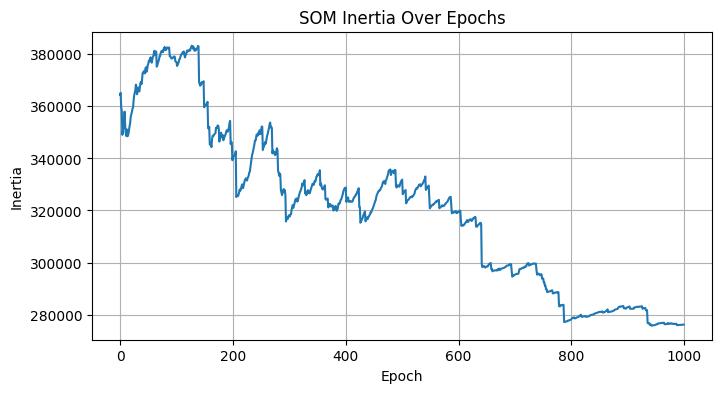

In [15]:
som.plot_inertia()

/kaggle/working/scikit-learn-som/src/som/som.py:260: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y if y is not None else "gray", cmap='viridis', edgecolor='k', alpha=0.6)


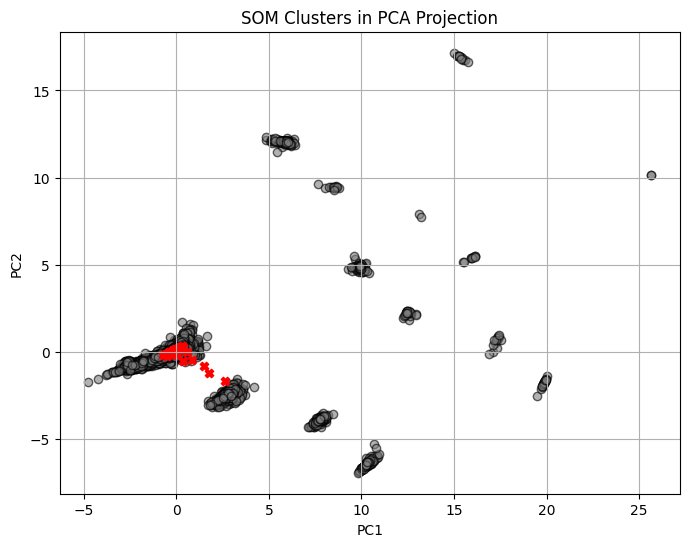

/kaggle/working/scikit-learn-som/src/som/som.py:260: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y if y is not None else "gray", cmap='viridis', edgecolor='k', alpha=0.6)


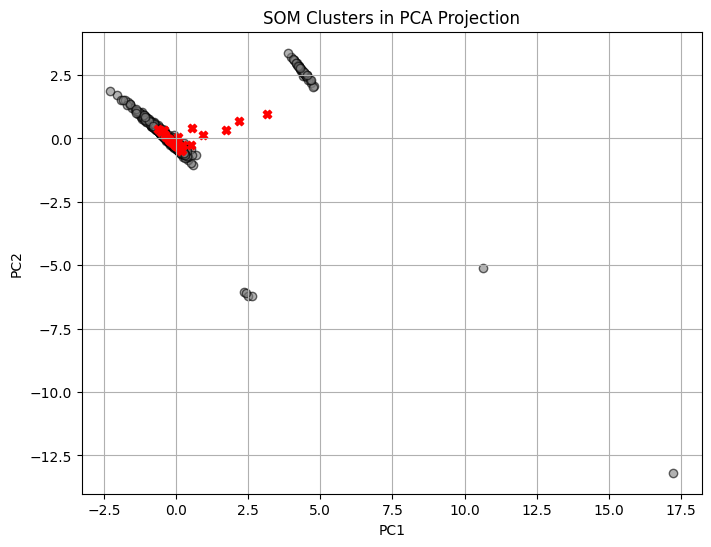

In [16]:
som.plot_clusters(X_train)
som.plot_clusters(X_test)

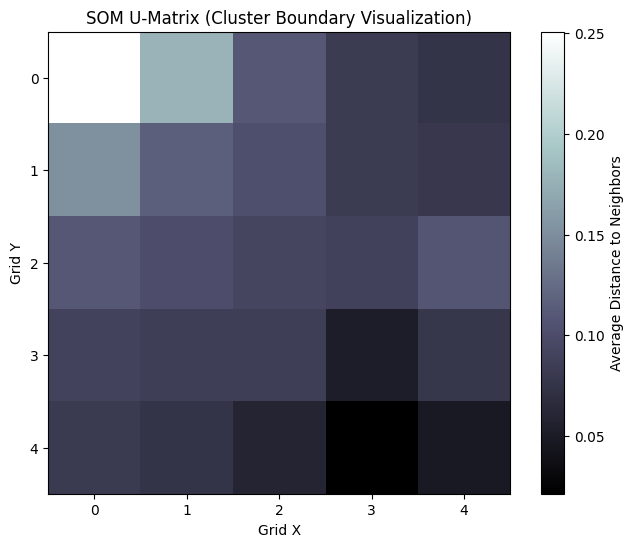

In [12]:
som.plot_umatrix()

In [ ]:
som.inertia_